# Zomato Restaurant

## Project Description

Data Storage:
This problem statement contains two datasets- Zomato.csv and country_code.csv.
Country_code.csv contains two variables:
• Country code
• Country name


### Target

Problem statement : In this dataset predict 2 things –
1) Average Cost for two
2) Price range

Hint : Use pandas merge operation -- pd.merge (df1,df2) to combine two datasets

### Importing Libraries

In [1]:
import warnings
warnings.simplefilter("ignore")
import missingno as ms   #for missing values visualization
import joblib

import pandas as pd
import numpy as np
import seaborn as sns    #for creating heatmap, time series plot, violin plots &so on
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

import scipy
import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
import lightgbm as lgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_columns', None)
import datetime as dt

##### Importing Dataset

In [2]:
df1 = pd.read_csv("zomato.csv", sep=",", encoding="latin", lineterminator='\n')

df1

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes\r
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [3]:
df2 = pd.read_excel("Country-Code.xlsx")
df2

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [4]:
df = pd.merge (df2,df1)
df

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes\r
0,1,India,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,1,India,3400341,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,1,India,3400005,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,500,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3,1,India,3400021,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,400,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
4,1,India,3400017,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",1000,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,216,United States,17697389,The Screaming Eagle,Waterloo,"228 E 4th St., Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-92.335523,42.498400,"American, Bar Food",10,Dollar($),No,No,No,No,1,3.7,Yellow,Good,101
9547,216,United States,17697424,The Thai Bowl,Waterloo,"624 Sycamore Street, Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-92.335769,42.497919,Thai,10,Dollar($),No,No,No,No,1,3.5,Yellow,Good,58
9548,216,United States,17697332,Tokyo Japanese Steak House,Waterloo,"1931 Sears Street, Waterloo, IA 50702",Waterloo,"Waterloo, Waterloo",-92.323400,42.465580,"Japanese, Steak, Sushi",25,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156
9549,216,United States,17694056,Theo Yianni's Authentic Greek Restaurant,Weirton,"322 American Way, Weirton, WV 26062",Weirton,"Weirton, Weirton",-80.529488,40.396043,"Burger, Greek, Sandwich",25,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156


- So here we can observe that the dataset contains the details of the Restaurant and Zomato details .
- In the dataset "Average Cost for two" is the target variable which seems to be having contineous classes so it will be termed to be a "REgressor Problem" where we need to predict Average Cost for two.
- also Price range is our another target variable.
- The dataset contains both numerical and categorical columns.

From above we see that there are total of 9551 rows and 22 columns from which our target columns will be **Price Range (classification problem)  and Average Cost for two (regression problem)** .

In [5]:
df.head()

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes\r
0,1,India,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,1,India,3400341,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,1,India,3400005,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,500,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3,1,India,3400021,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,400,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
4,1,India,3400017,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",1000,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177


In [6]:
df.tail()

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes\r
9546,216,United States,17697389,The Screaming Eagle,Waterloo,"228 E 4th St., Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-92.335523,42.498400,"American, Bar Food",10,Dollar($),No,No,No,No,1,3.7,Yellow,Good,101
9547,216,United States,17697424,The Thai Bowl,Waterloo,"624 Sycamore Street, Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-92.335769,42.497919,Thai,10,Dollar($),No,No,No,No,1,3.5,Yellow,Good,58
9548,216,United States,17697332,Tokyo Japanese Steak House,Waterloo,"1931 Sears Street, Waterloo, IA 50702",Waterloo,"Waterloo, Waterloo",-92.323400,42.465580,"Japanese, Steak, Sushi",25,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156
9549,216,United States,17694056,Theo Yianni's Authentic Greek Restaurant,Weirton,"322 American Way, Weirton, WV 26062",Weirton,"Weirton, Weirton",-80.529488,40.396043,"Burger, Greek, Sandwich",25,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156
9550,216,United States,17559793,Fishpatrick's Crabby Cafe,Winchester Bay,"196 Bayfront Loop, Winchester Bay, OR 97467",Winchester Bay,"Winchester Bay, Winchester Bay",-124.175346,43.678998,"Burger, Seafood, Steak",25,Dollar($),No,No,No,No,2,3.2,Orange,Average,16


In [7]:
df.shape

(9551, 22)

- The dataset contains 9551 rows and 22 columns .

Out of 22 columns 20 are independent features and remaining 2 is our target column that is 'Average Cost for two' and "Price range"

# Exploratory Data Analysis(EDA)

In [8]:
df.columns.tolist()

['Country Code',
 'Country',
 'Restaurant ID',
 'Restaurant Name',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Aggregate rating',
 'Rating color',
 'Rating text',
 'Votes\r']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9551 non-null   int64  
 1   Country               9551 non-null   object 
 2   Restaurant ID         9551 non-null   int64  
 3   Restaurant Name       9551 non-null   object 
 4   City                  9551 non-null   object 
 5   Address               9551 non-null   object 
 6   Locality              9551 non-null   object 
 7   Locality Verbose      9551 non-null   object 
 8   Longitude             9551 non-null   float64
 9   Latitude              9551 non-null   float64
 10  Cuisines              9542 non-null   object 
 11  Average Cost for two  9551 non-null   int64  
 12  Currency              9551 non-null   object 
 13  Has Table booking     9551 non-null   object 
 14  Has Online delivery   9551 non-null   object 
 15  Is delivering now    

there is some null column present in the dataset. also its need to clear.

- The dataset contains 3 types of data namely integer,float type and object type.

We will convert this object type data into numerical using encoding techniquies before building the model.

## checking null values

In [10]:
df.isnull().sum()

Country Code            0
Country                 0
Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes\r                 0
dtype: int64

- There is missing values present in the dataset and data to be clean.

### % of Null value present in the dataset

In [11]:
n=(df.isnull().sum()/(len(df)))*100
np.round(n,2)

Country Code            0.00
Country                 0.00
Restaurant ID           0.00
Restaurant Name         0.00
City                    0.00
Address                 0.00
Locality                0.00
Locality Verbose        0.00
Longitude               0.00
Latitude                0.00
Cuisines                0.09
Average Cost for two    0.00
Currency                0.00
Has Table booking       0.00
Has Online delivery     0.00
Is delivering now       0.00
Switch to order menu    0.00
Price range             0.00
Aggregate rating        0.00
Rating color            0.00
Rating text             0.00
Votes\r                 0.00
dtype: float64

### % of Null value present in the dataset - chart view

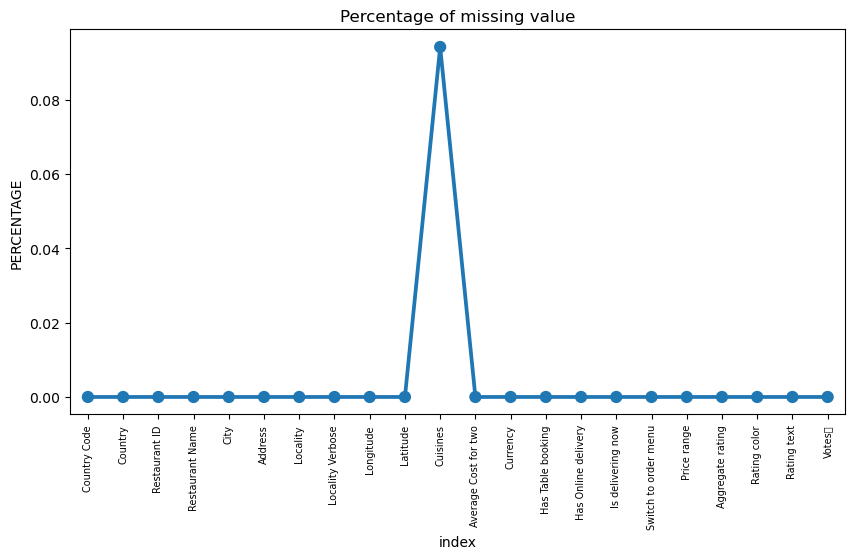

In [12]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()

plt.figure(figsize=(10,5))

ax=sns.pointplot('index',0,data=missing)
plt.xticks(rotation=90,fontsize=7)

plt.ylabel('PERCENTAGE')
plt.title('Percentage of missing value')

plt.show()

### visual representation of Null values- Row location

<AxesSubplot:>

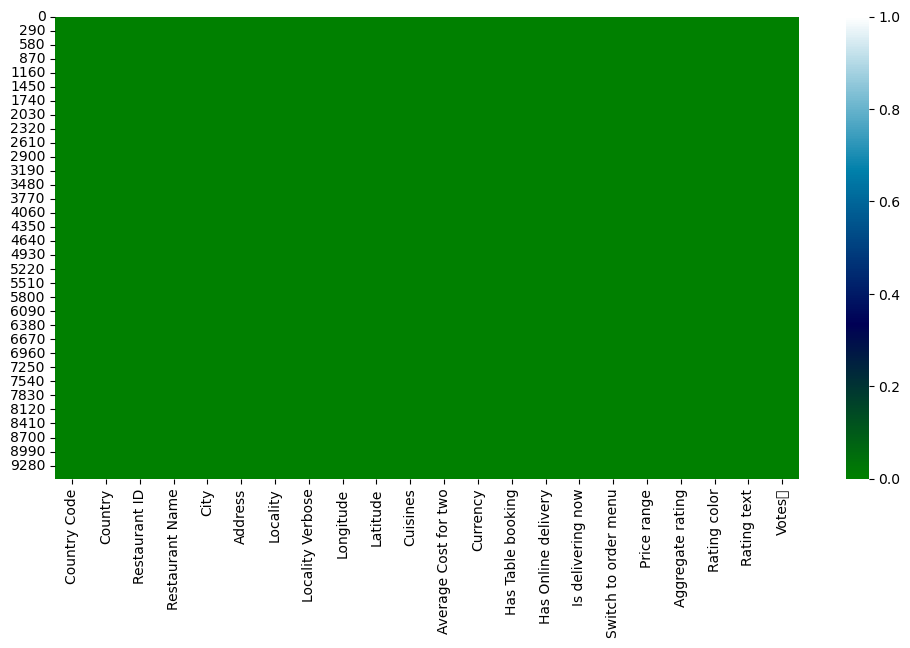

In [13]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),cmap='ocean')

the white line meant there is missing value in the dataset at their position

<AxesSubplot:>

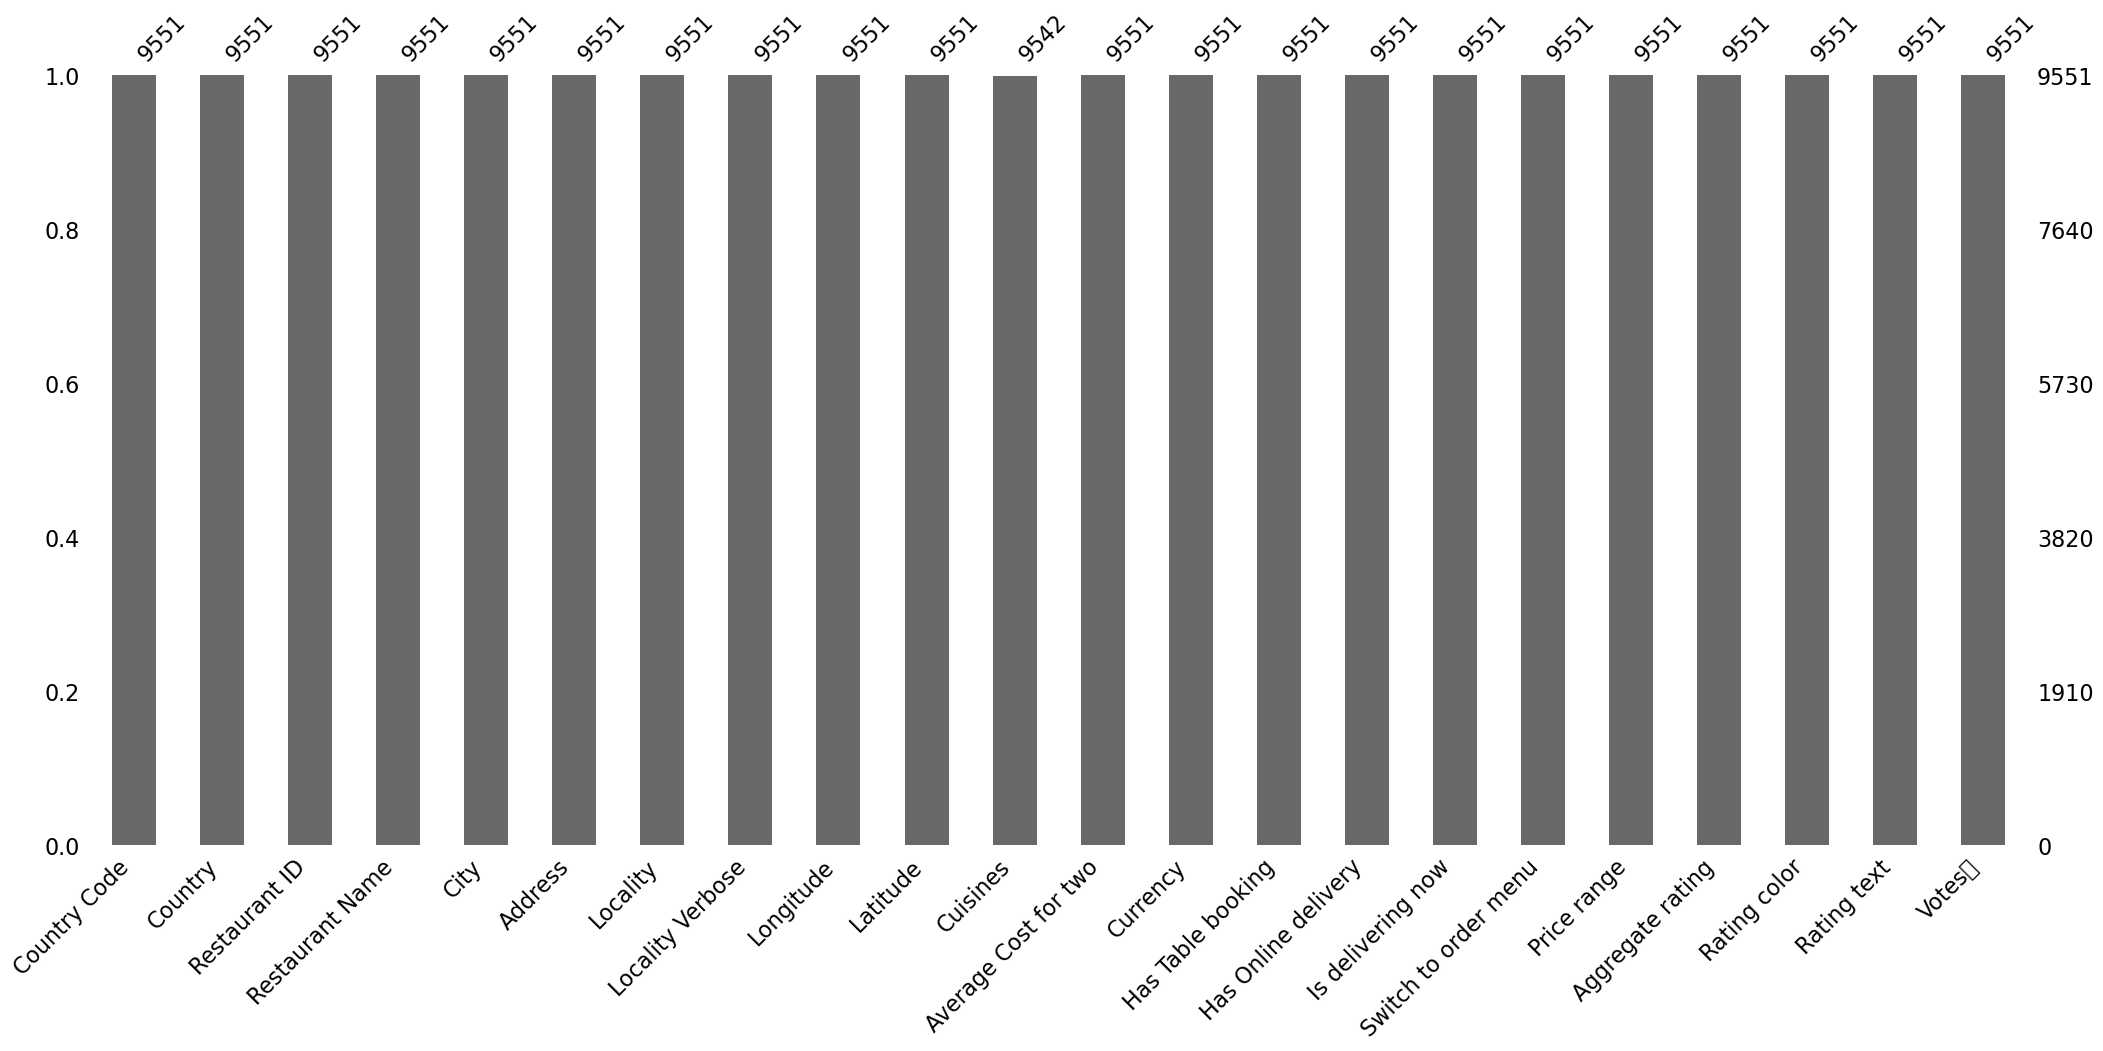

In [14]:
ms.bar(df)

So after getting a visual on the missing values we see that our dataset columns have only few null values present in them..

<AxesSubplot:>

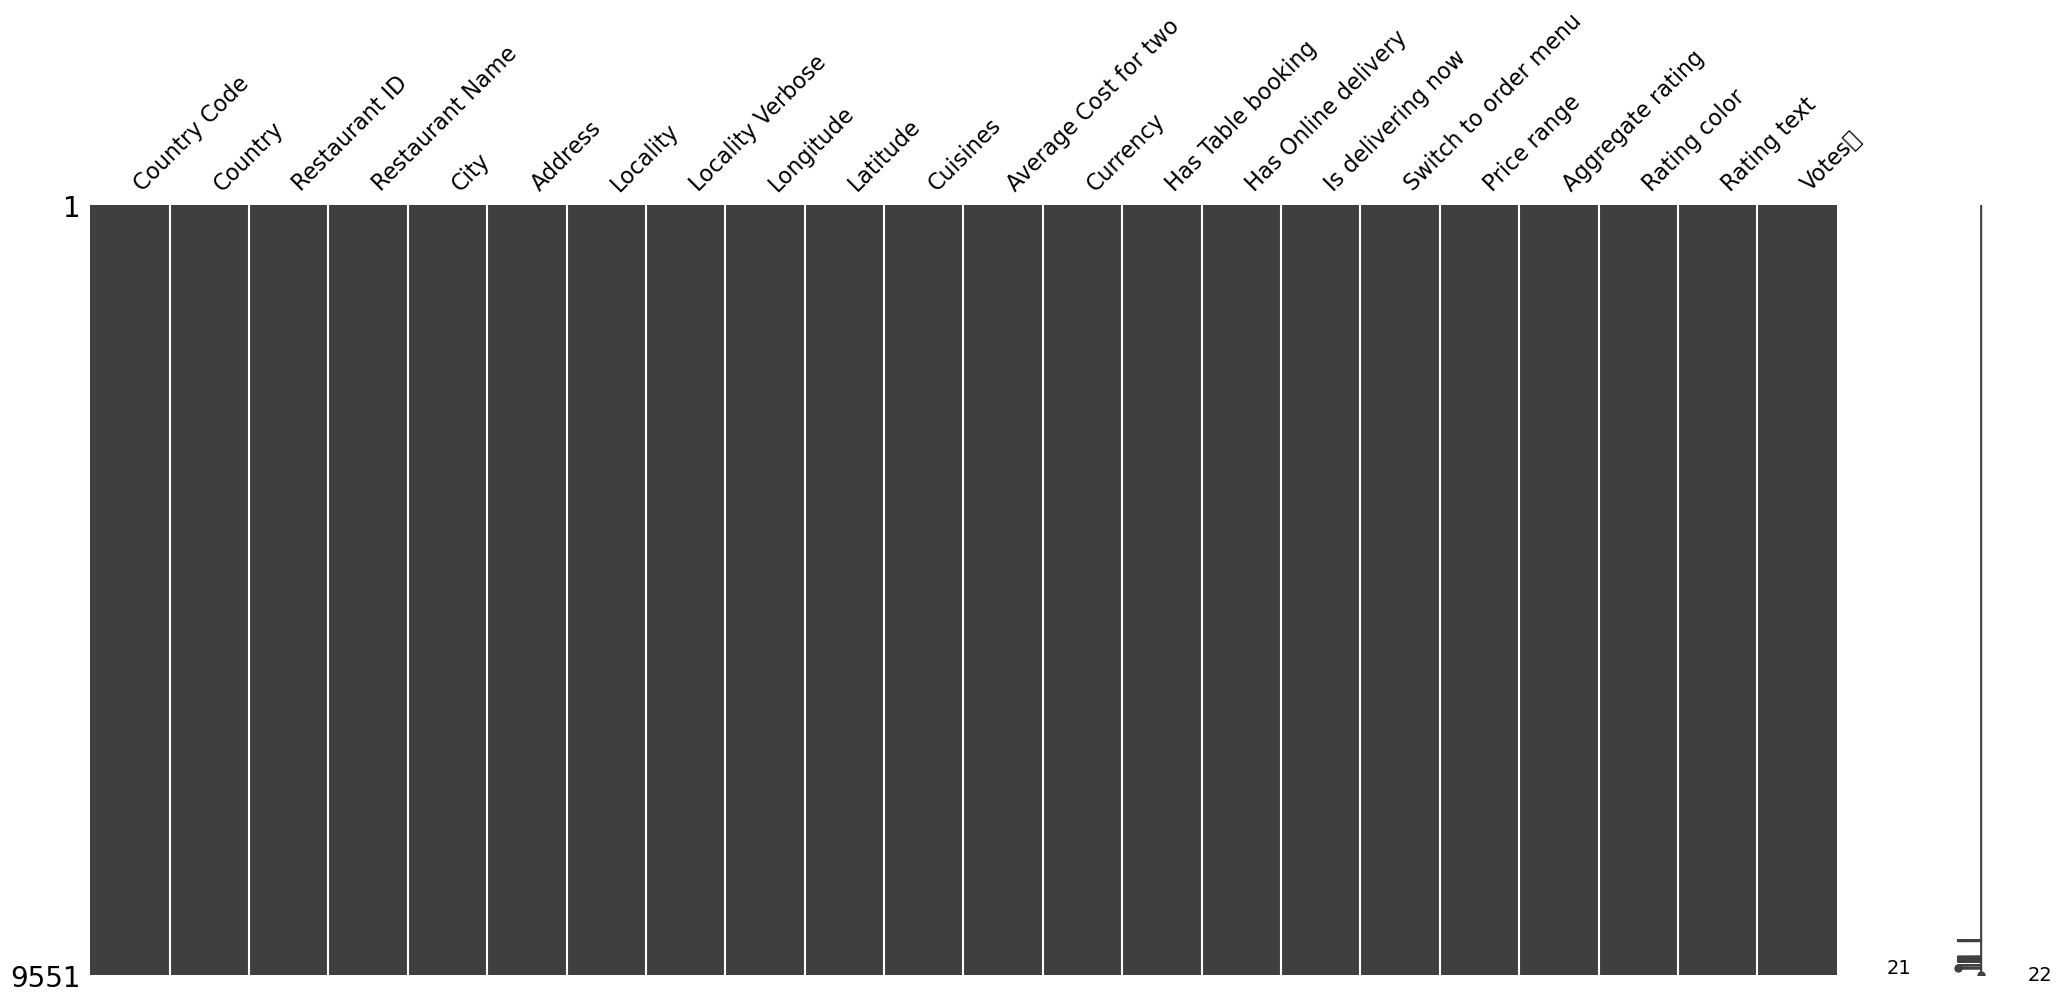

In [15]:
ms.matrix(df)

 missing value highlighted visually at right side bar

### Treating Null values in the dataset

In [16]:
##Mode imputation is used when dealing with categorical data
##Mean imputation is used when the distribution of the data is normal & missing values are random
##Median imputation is appropriate when the distribution of the data is skewed
df["Cuisines"].fillna(df["Cuisines"].mode()[0],inplace=True)

### checking after clear the null values

In [17]:
df.isnull().sum()

Country Code            0
Country                 0
Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes\r                 0
dtype: int64

No null values present in the dataset.

### checking unique values

In [18]:
df.nunique()

Country Code              15
Country                   15
Restaurant ID           9551
Restaurant Name         7446
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes\r                 1012
dtype: int64

# Value Count Function

Let's check the list of value counts in each columns to find if there are any unexpected or corrupted entries in the dataset.

In [19]:
for i in df.columns:
    print(df[i].value_counts())
    print('='*99)

1      8652
216     434
215      80
30       60
189      60
214      60
148      40
208      34
14       24
162      22
94       21
166      20
184      20
191      20
37        4
Name: Country Code, dtype: int64
India             8652
United States      434
United Kingdom      80
Brazil              60
South Africa        60
UAE                 60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Qatar               20
Singapore           20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64
3400025     1
309811      1
18460981    1
18287389    1
1629        1
           ..
4096        1
18358700    1
2217        1
18398571    1
17559793    1
Name: Restaurant ID, Length: 9551, dtype: int64
Cafe Coffee Day                       83
Domino's Pizza                        79
Subway                                63
Green Chick Chop                      51
McDonald's                            48
       

From above we notice that the ***restaurant name*** and ***address*** have too many unique values so that wont be contributing much in our prediction. Also stated in our problem statement it is the locality and cuisine which is a matter of interest.

And, ***locality*** and ***locality verbose*** columns provide almost the same data with verbose providing some extra irrelevant data as the word verbose describes. So we will dropping the verbose column.Locality column also contains the city's name so ***city*** column is also not needed.

And, ***longitude and latitude*** columns are not much needed in our dataset as we already have the locality column. 

Also as the country code and country would be same after encoding the data, so ***country code*** wont be useful as much and 
just provide multicollinearity.

And, ***switch to order menu*** column has only one value and ***is delivering now*** column also have almost one unique value so that wont be affecting our prediction.

And, ***rating text*** and ***rating color*** are similar toeach ther with equal valuesso those will just provide multicollinearity after ecnoding so we can drop one out of the two.

So we will be ***dropping ten columns.***

In [20]:
df.drop(columns=['Switch to order menu','Locality Verbose','Is delivering now','Rating color','Longitude','Latitude','Country Code','City'],inplace=True)

### finding "?" mark

In [21]:
result = df.isin(["?"]).sum()
result

Country                 0
Restaurant ID           0
Restaurant Name         0
Address                 0
Locality                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating text             0
Votes\r                 0
dtype: int64

#### Checking Null value again

In [22]:
df.isnull().sum()

Country                 0
Restaurant ID           0
Restaurant Name         0
Address                 0
Locality                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating text             0
Votes\r                 0
dtype: int64

In [23]:
# checking the list of value counts in Target column
df['Average Cost for two'].value_counts()

500       900
300       897
400       857
200       687
600       652
         ... 
70000       1
165000      1
450000      1
120000      1
4300        1
Name: Average Cost for two, Length: 140, dtype: int64

In [24]:
# checking the list of value counts in Target column
df['Price range'].value_counts()

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64

- There are 140 unique values in the target column "Average Cost for two"

- There are 4 unique values in the target column "Price range"

We can say that max avg cost for two is 800000

We can also observe that the class imbalancing issue here so will balance the data using SMOTE before machine learning modeling.

In [25]:
df['Average Cost for two'].max()

800000

max cost for two 

In [26]:
df['Average Cost for two'].min()

0

## find duplicate values

In [27]:
df.duplicated().sum()

0

## seperate the data columns

In [28]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("\n")
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Country', 'Restaurant Name', 'Address', 'Locality', 'Cuisines',
       'Currency', 'Has Table booking', 'Has Online delivery', 'Rating text'],
      dtype='object')


Numerical Variables:
['Restaurant ID', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes\r']


In [29]:
cat_cols.size

9

In [30]:
len(num_cols)

5

In [31]:
df.shape

(9551, 14)

## Descriptive Statistics

In [32]:
df.describe()

,Restaurant ID,Average Cost for two,Price range,Aggregate rating,Votes\r
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,800000.000000,4.000000,4.900000,10934.000000


This gives the statistical information of the dataset . The summary of this dataset looks perfect since there is no negative/invalid values present.

From the above description we can observe the following things.

1. Range,Mean and Standard deviation of each column
2. There maybe some outliers present as 75 % values and max vaues have considerable differences in some columns.
3. Skewness present in some columns as mean and median (50%) values are different for some columns.

Also Restaurant id is also an irrelevant column in our prediction so we will dropping it as well.

In [33]:
df.drop(['Restaurant ID'],axis=1,inplace=True)

### Checking Description through heatmap also.

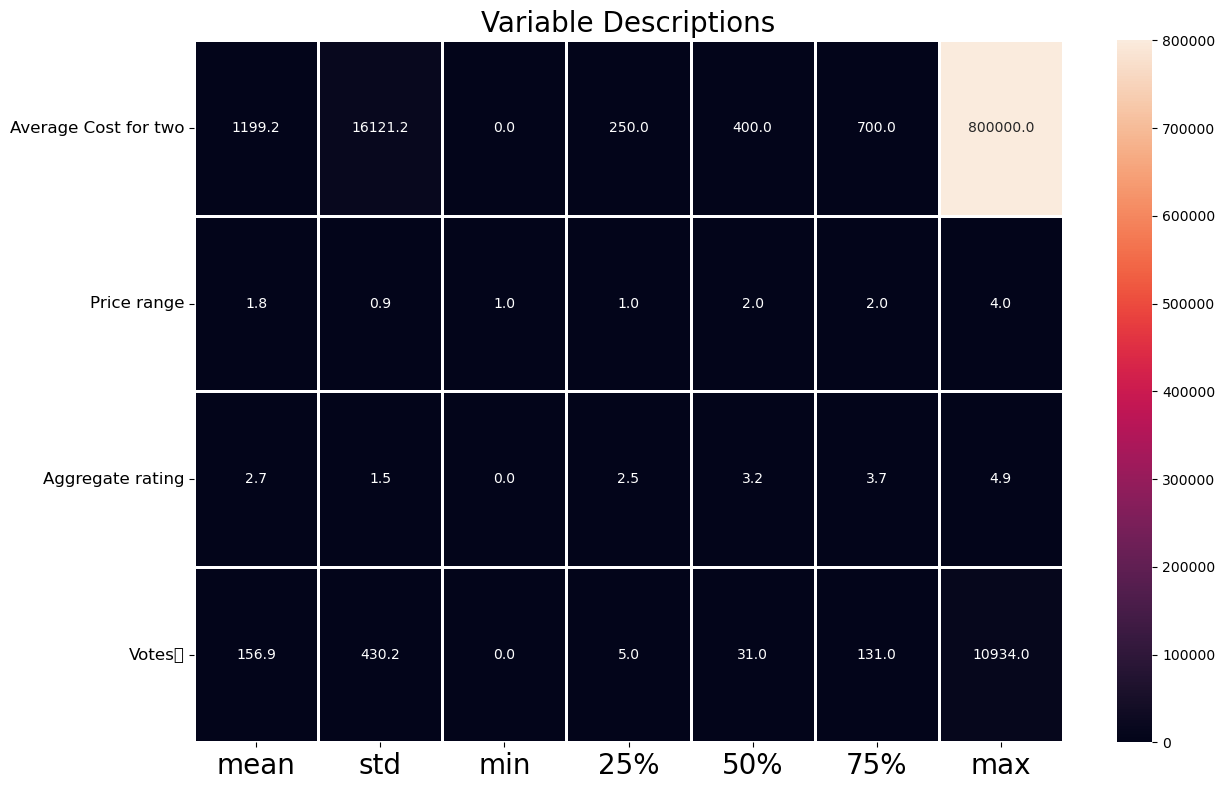

In [34]:
plt.figure(figsize=(13,8))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=1,annot=True,fmt='.1f')
plt.xticks(fontsize=20)
plt.yticks(rotation=0, fontsize=12)
plt.title('Variable Descriptions', fontsize=20)
plt.tight_layout()
plt.show()

#### Observation of Describe of Datasets:

- We observe from description of dataset that there are 32531 rows and  13 columns, in which 4 columns contains Continuous data and 9 columns contains Categorical data.
- There are no negative value present in dataset but data is not normally distributed and also skewness is present.
- we will check for value 0, as 0 value is also null value but it is value that why while checking for null value it is not counted.

In [35]:
df.describe(include='object')

,Country,Restaurant Name,Address,Locality,Cuisines,Currency,Has Table booking,Has Online delivery,Rating text
count,9551,9551,9551,9551,9551,9551,9551,9551,9551
unique,15,7446,8918,1208,1825,12,2,2,6
top,India,Cafe Coffee Day,"Sector 41, Noida",Connaught Place,North Indian,Indian Rupees(Rs.),No,No,Average
freq,8652,83,11,122,945,8652,8393,7100,3737


From above desribe function we are describing the data from all the object type columns and we notice the following-

1. Unique values in each columns
2. Most frequent value in each column. (mode)
3. Frequency of the most occuring value.

In [36]:
df.shape

(9551, 13)

### Updating categorial and numerical column 

In [37]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("\n")
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Country', 'Restaurant Name', 'Address', 'Locality', 'Cuisines',
       'Currency', 'Has Table booking', 'Has Online delivery', 'Rating text'],
      dtype='object')


Numerical Variables:
['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes\r']


## Data Visualization

### Univariate Analysis

### Using Countplot for categorical columns

In [38]:
#col_n=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']
col_cat=['Country','Currency','Has Table booking','Has Online delivery','Rating text']

df_cat=df.drop(columns=num_cols,axis=1)
df_n=df.drop(columns=cat_cols,axis=1)

In [39]:
cat_cols

Index(['Country', 'Restaurant Name', 'Address', 'Locality', 'Cuisines',
       'Currency', 'Has Table booking', 'Has Online delivery', 'Rating text'],
      dtype='object')

Count Plot for  Country  column
India             8652
United States      434
United Kingdom      80
Brazil              60
South Africa        60
UAE                 60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Qatar               20
Singapore           20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64


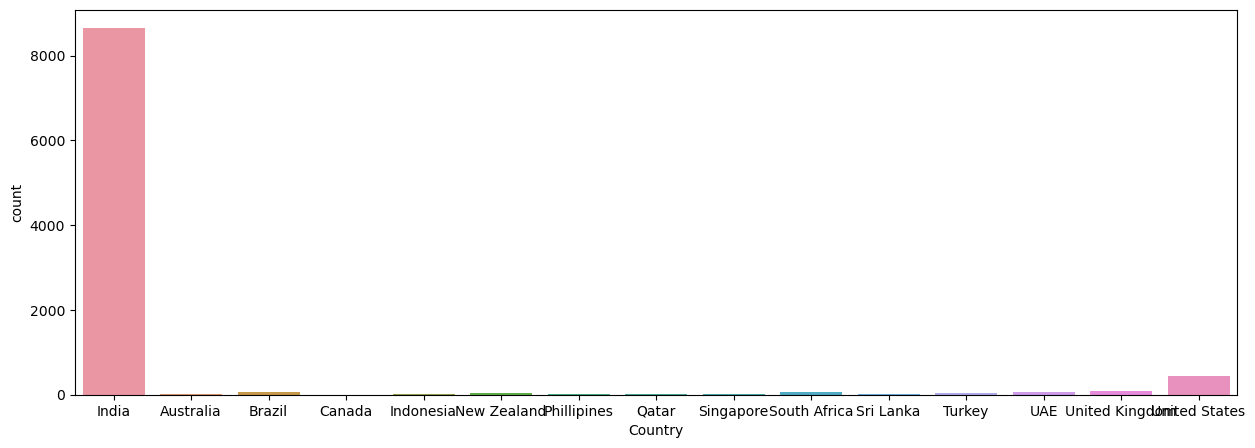

Count Plot for  Currency  column
Indian Rupees(Rs.)        8652
Dollar($)                  482
Pounds(£)                  80
Brazilian Real(R$)          60
Rand(R)                     60
Emirati Diram(AED)          60
NewZealand($)               40
Turkish Lira(TL)            34
Botswana Pula(P)            22
Indonesian Rupiah(IDR)      21
Qatari Rial(QR)             20
Sri Lankan Rupee(LKR)       20
Name: Currency, dtype: int64


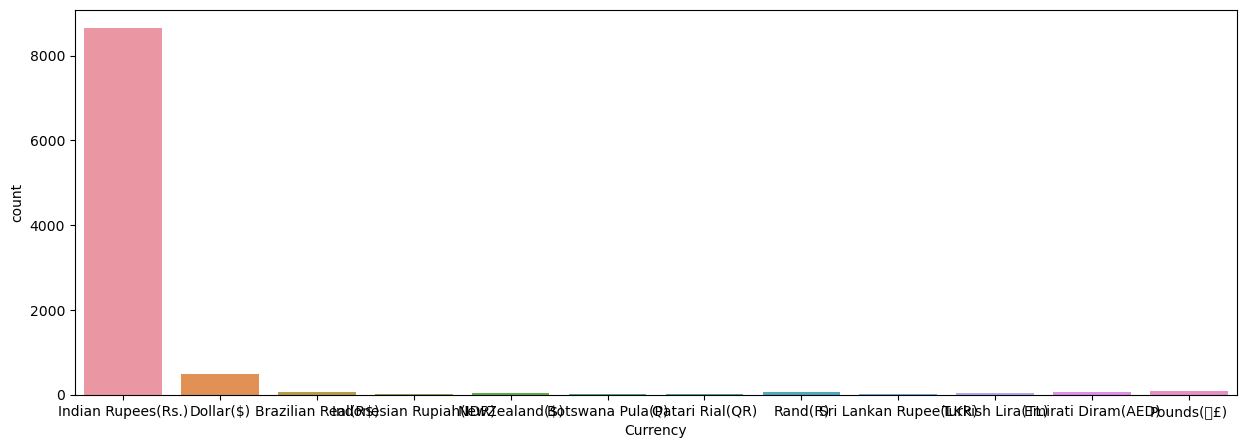

Count Plot for  Has Table booking  column
No     8393
Yes    1158
Name: Has Table booking, dtype: int64


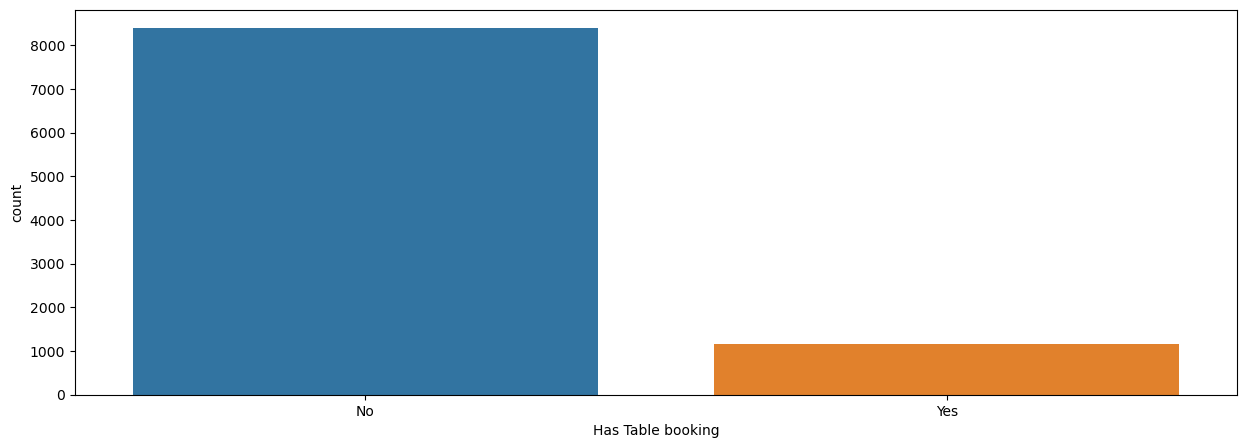

Count Plot for  Has Online delivery  column
No     7100
Yes    2451
Name: Has Online delivery, dtype: int64


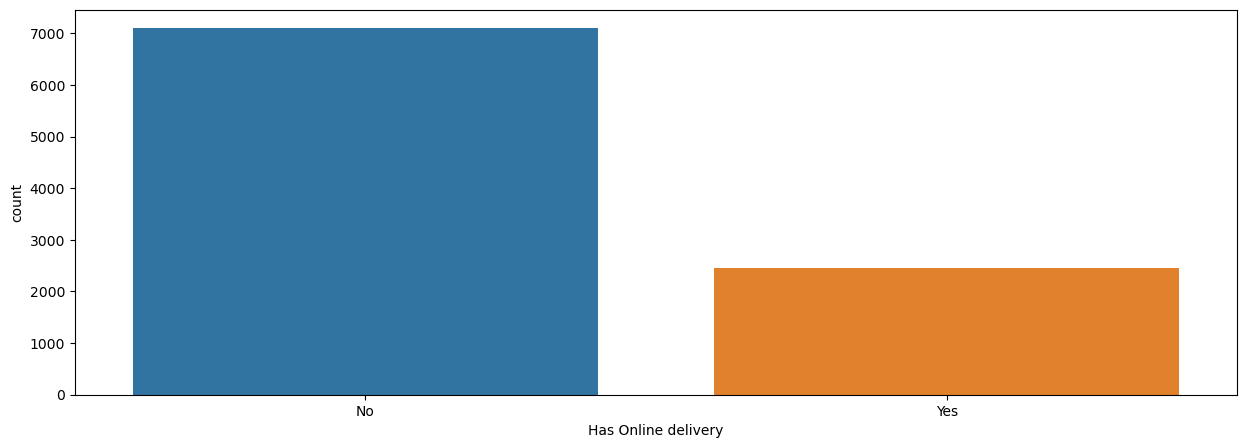

Count Plot for  Rating text  column
Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: Rating text, dtype: int64


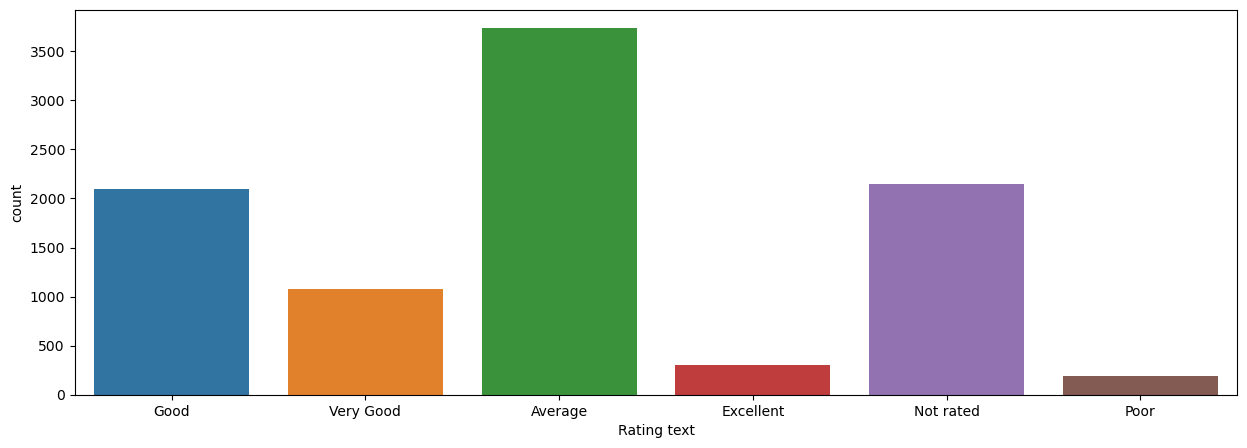

In [40]:
for i in col_cat:
    print('Count Plot for ',i,' column')
    plt.figure(figsize=(15,5))
    print(df[i].value_counts())
    sns.countplot(i,data=df_cat)
    print("="*100)
    plt.show()

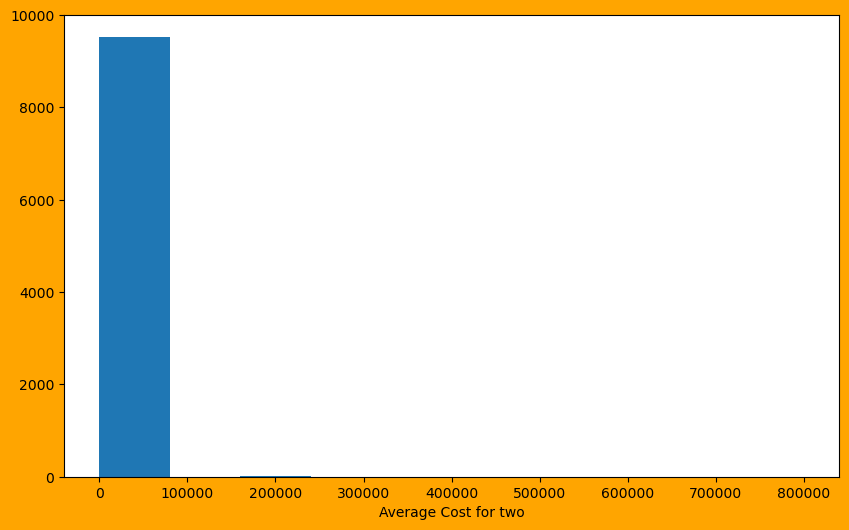

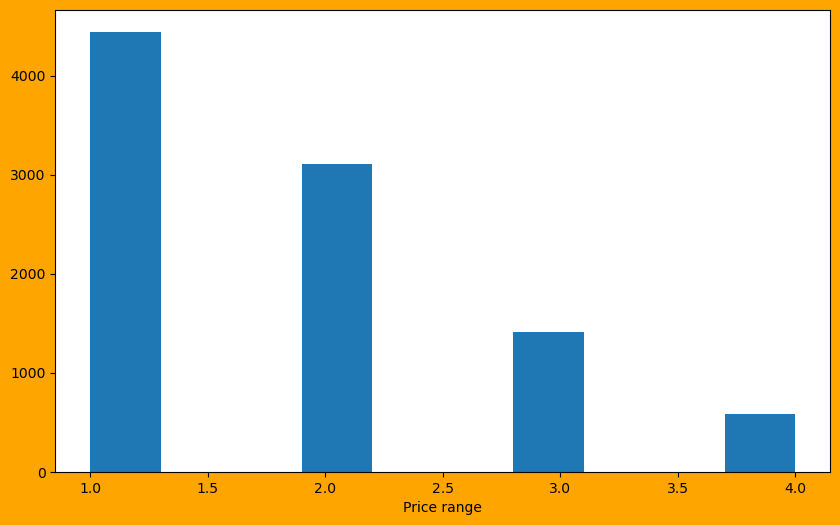

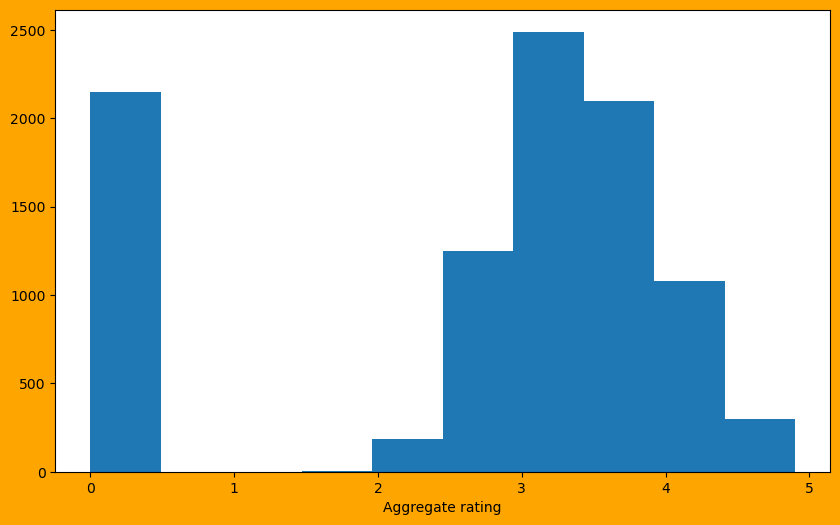

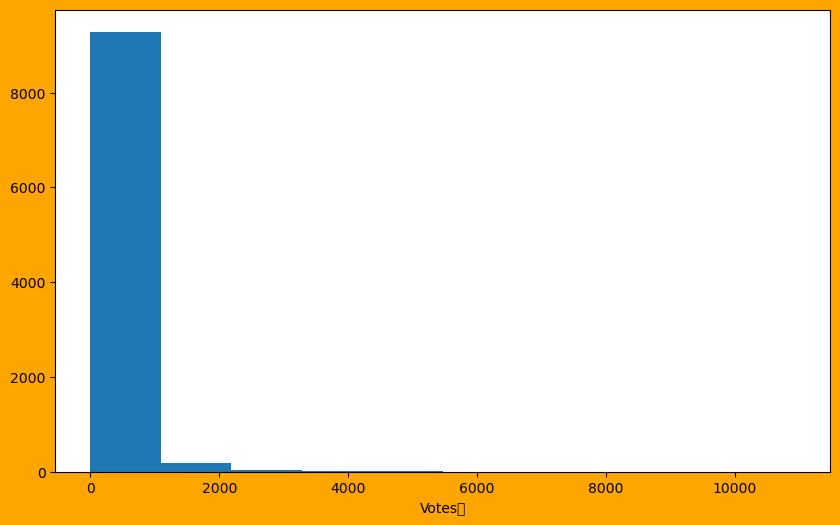

In [41]:
# Histogram plot:

for i in num_cols:
    plt.figure(figsize=(10,6),facecolor='orange')
    plt.hist(df[i],bins=10)
    plt.xlabel(i)
    plt.show()

### (categorial column % wise spread)

Single digit category column name: Country


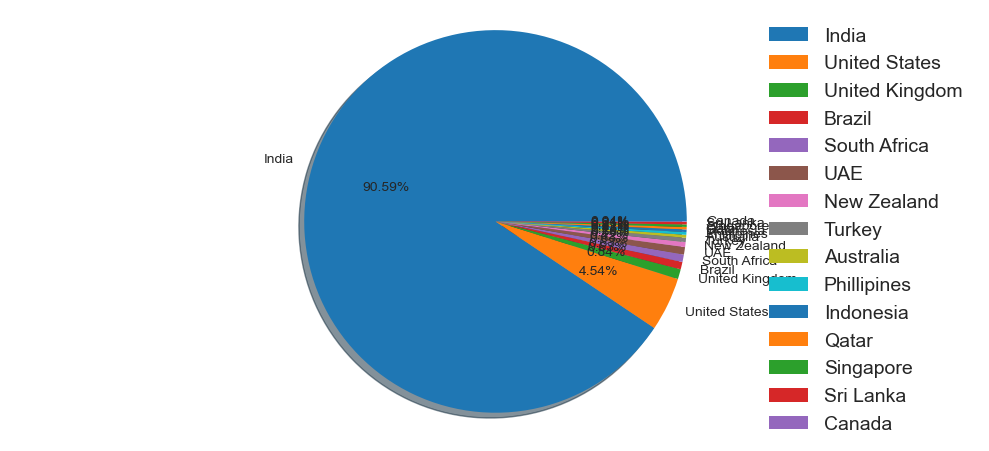

Single digit category column name: Currency


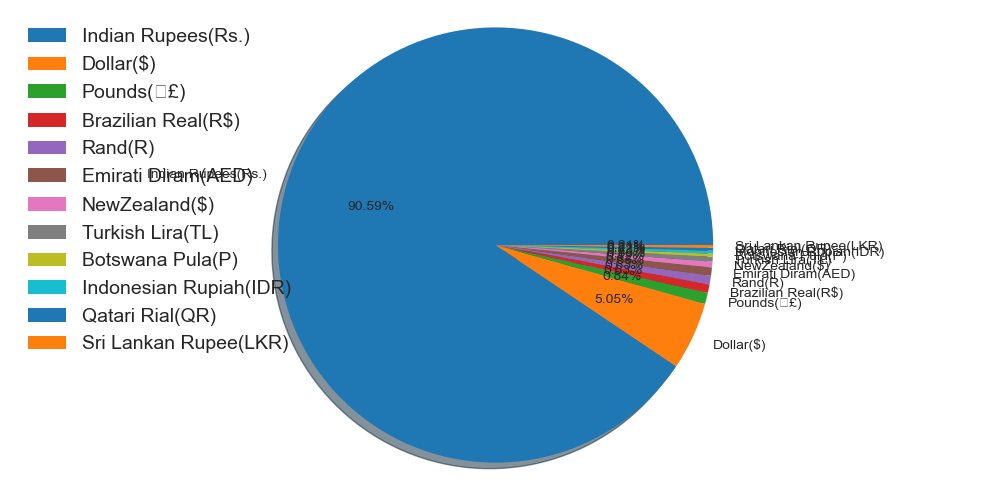

Single digit category column name: Has Table booking


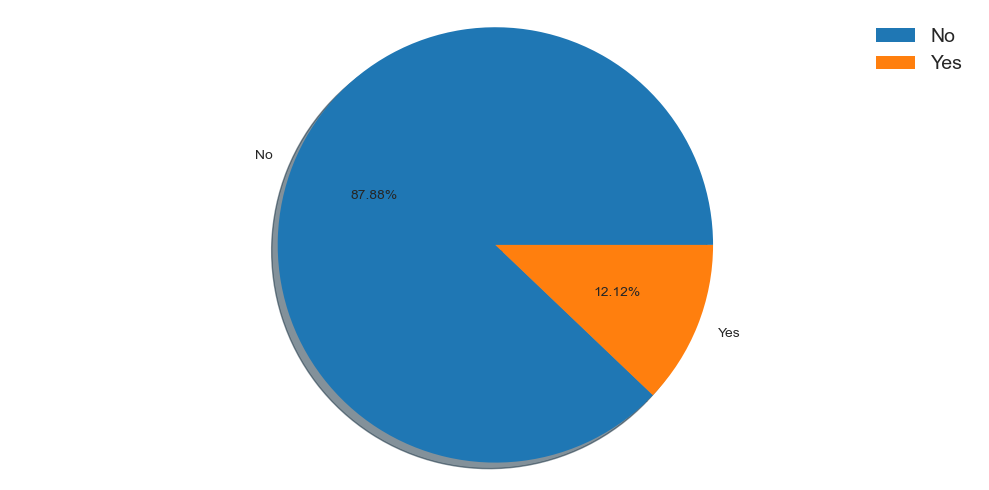

Single digit category column name: Has Online delivery


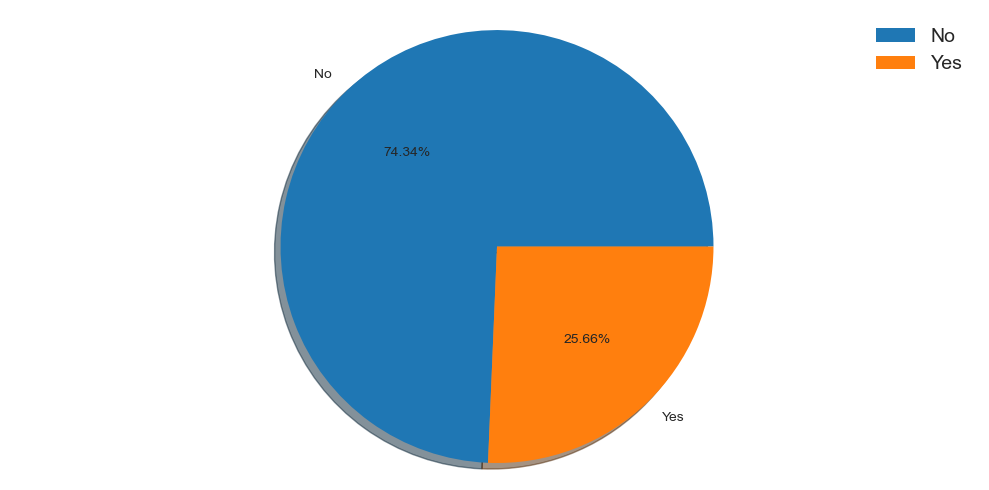

Single digit category column name: Rating text


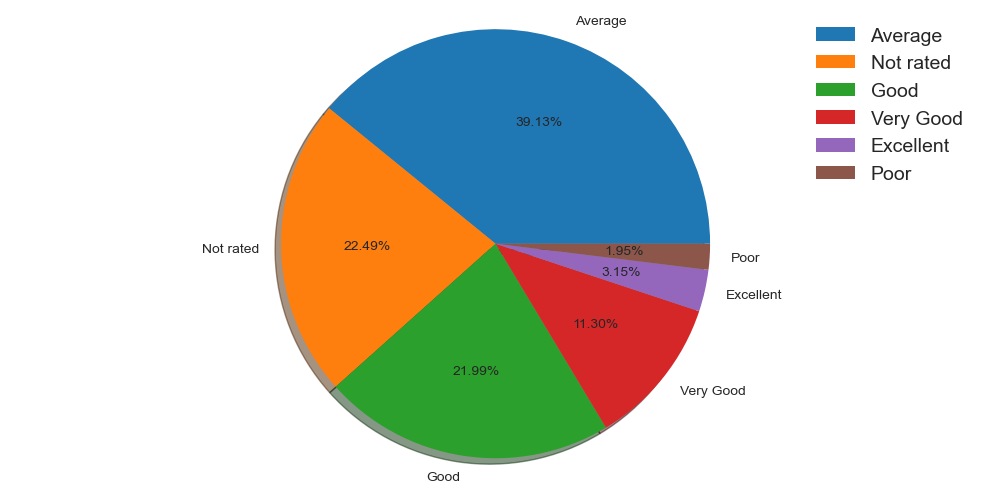

In [42]:
def generate_pie(x):
    plt.style.use('seaborn-white')
    plt.figure(figsize=(10,5))
    plt.pie(x.value_counts(), labels=x.value_counts().index, shadow=True, autopct='%1.2f%%')
    plt.legend(prop={'size':14})
    plt.axis('equal')
    plt.tight_layout()
    return plt.show()

for i in df[col_cat]:
    print(f"Single digit category column name:", i)
    generate_pie(df[i])

### Using Histplot for continuous columns

#Histplot for Average Cost for two column
500       900
300       897
400       857
200       687
600       652
         ... 
70000       1
165000      1
450000      1
120000      1
4300        1
Name: Average Cost for two, Length: 140, dtype: int64


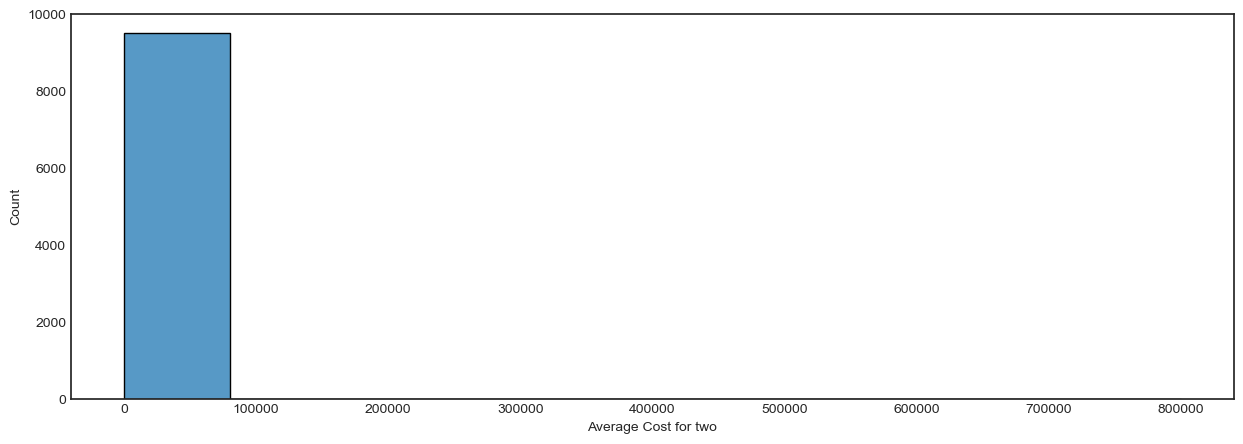

#Histplot for Price range column
1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64


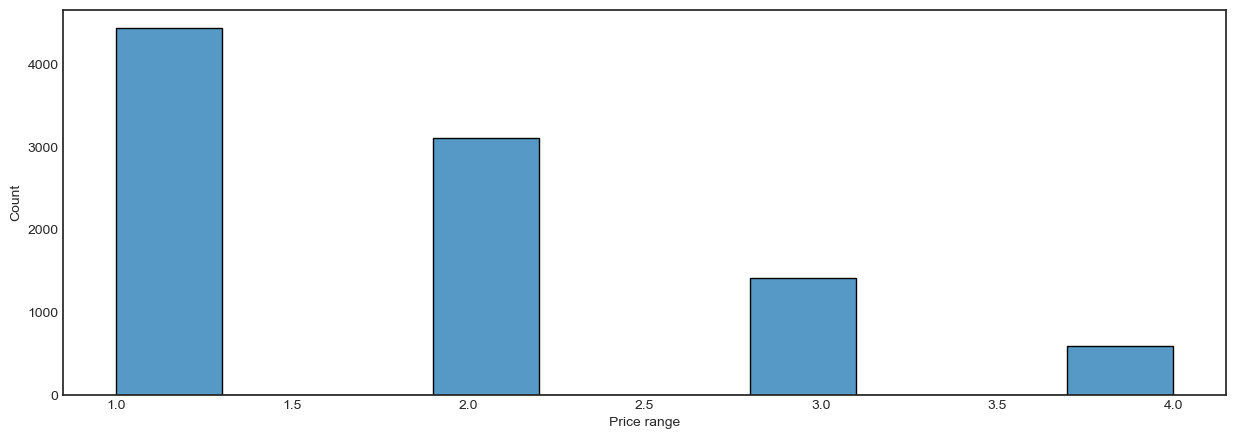

#Histplot for Aggregate rating column
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: Aggregate rating, dtype: int64


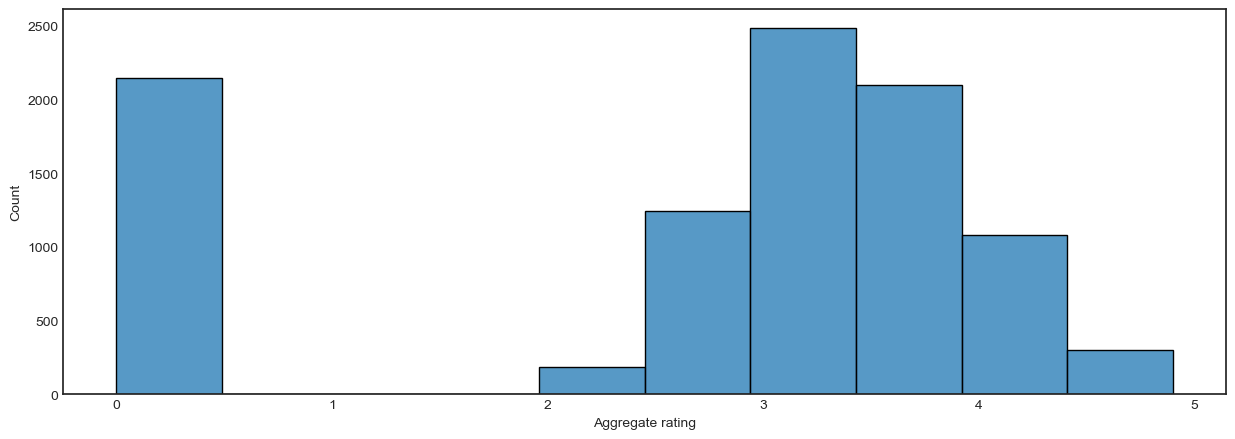

 column
0       1094
1        483
2        327
3        244
4        207
        ... 
1801       1
1333       1
1863       1
1134       1
575        1
Name: Votes\r, Length: 1012, dtype: int64


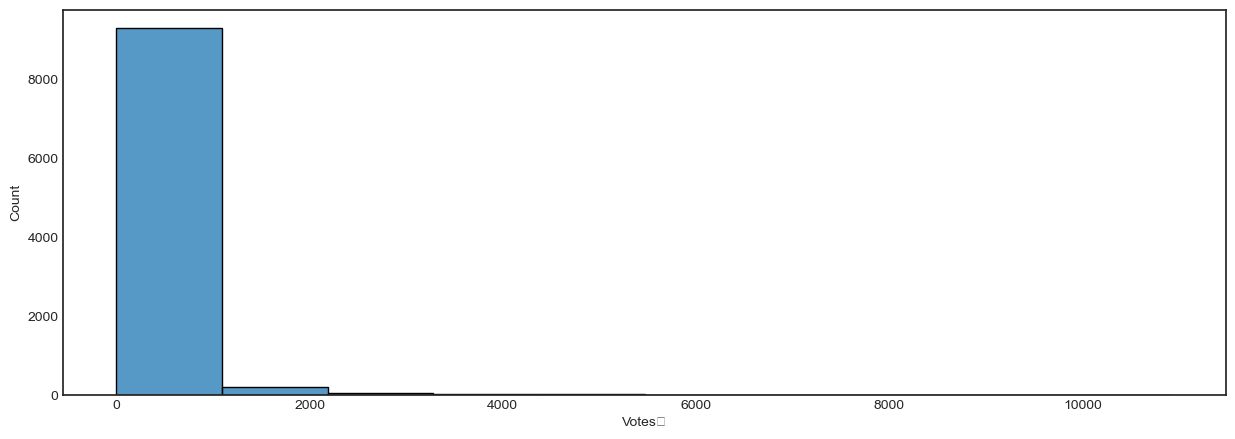

In [43]:
for j in df_n:
    print('#Histplot for', j, 'column')
    print(df_n[j].value_counts())
    plt.figure(figsize=(15, 5))
    sns.histplot(x=j, data=df_n, bins=10) 
    plt.show()
    print('=' * 100)

### Bivariate Analysis

Double digit category column name: Average Cost for two


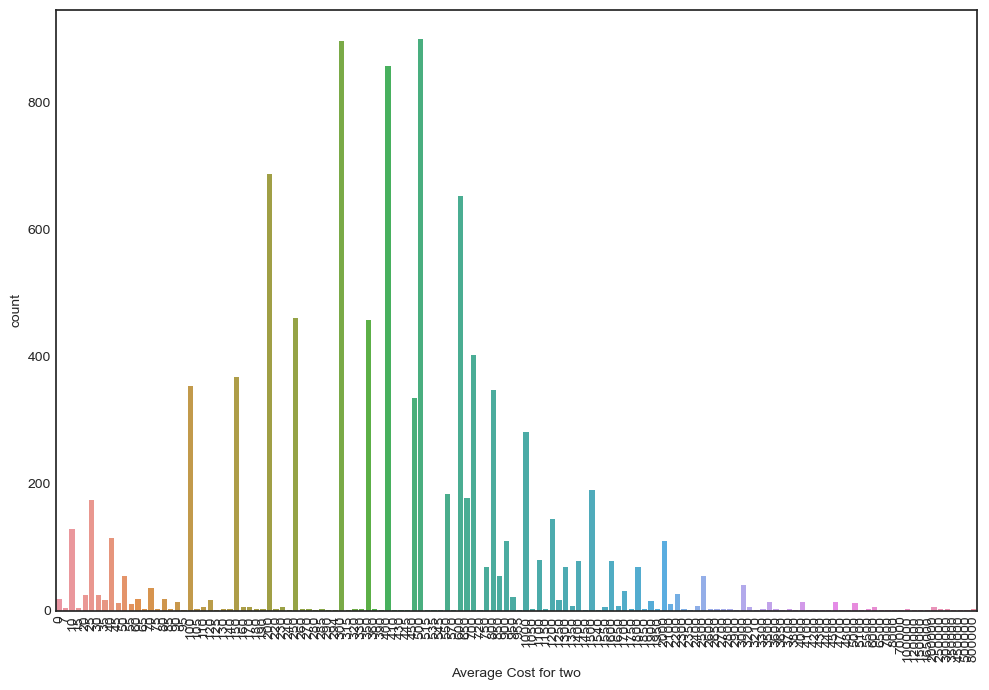

Double digit category column name: Price range


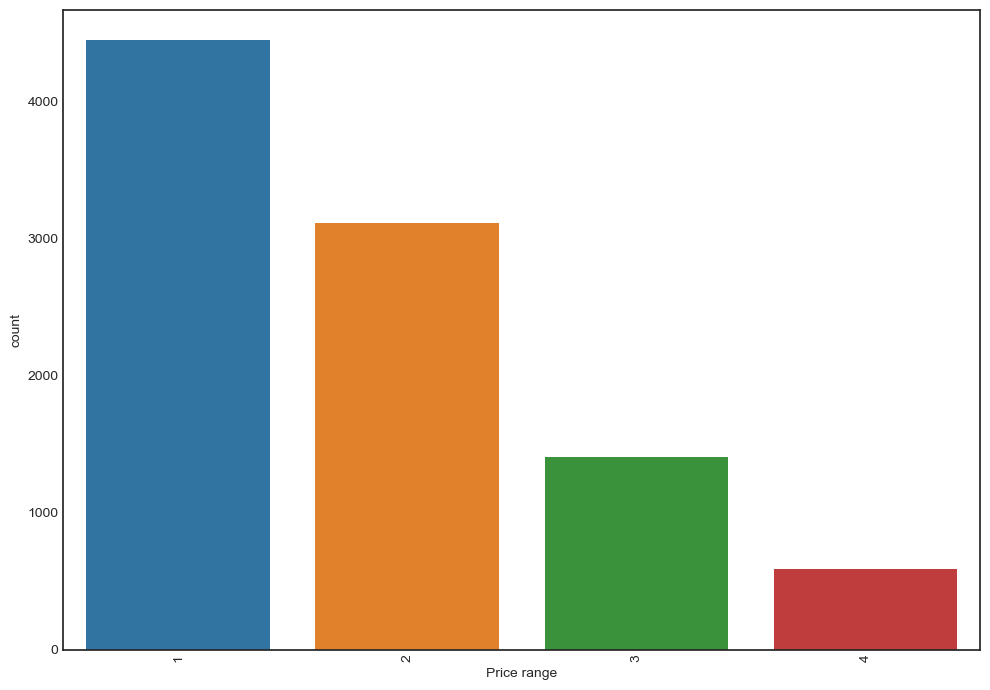

Double digit category column name: Aggregate rating


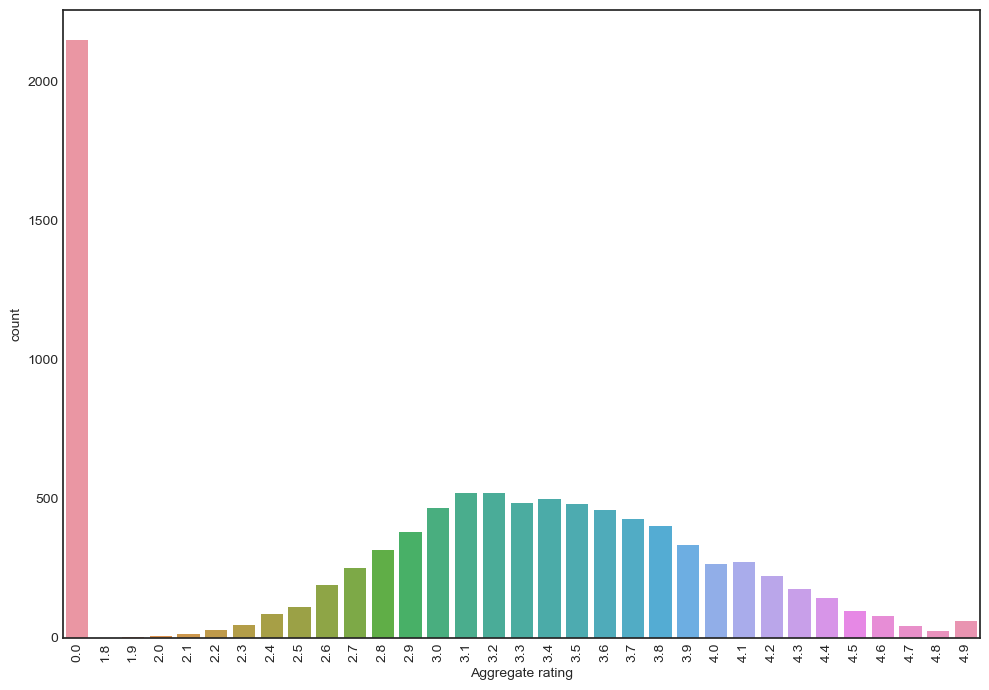

Double digit category column name: Votes


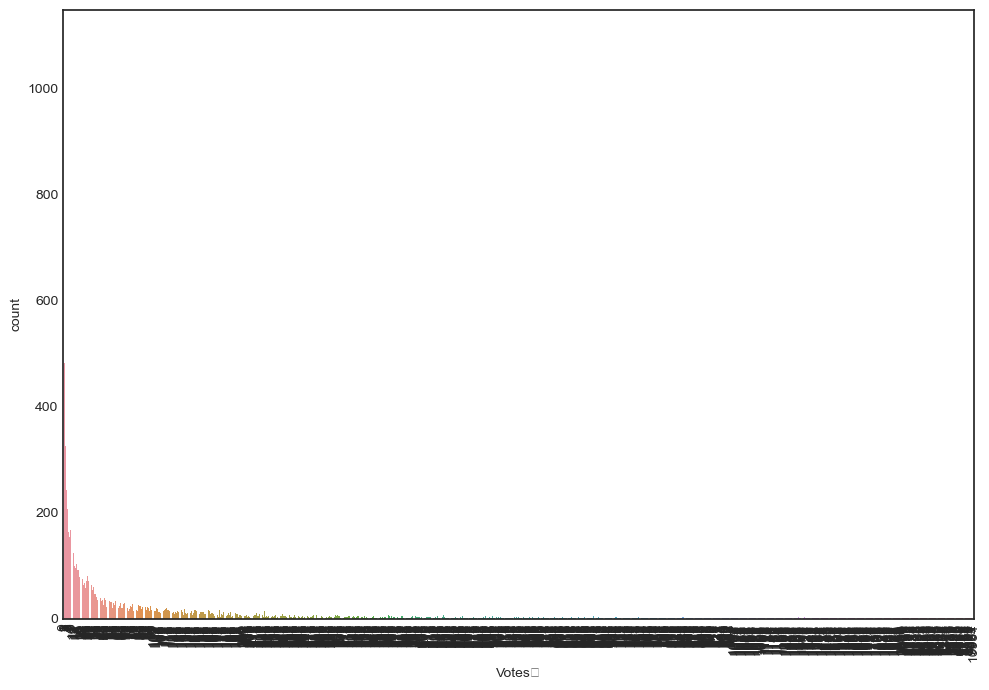

In [44]:
def generate_countplot(x):
    plt.figure(figsize=(10,7))
    sns.countplot(x)
    plt.xticks(rotation=90)
    plt.tight_layout()
    return plt.show()

col2 = ['umbrella_limit', 'insured_occupation', 'auto_make', 'insured_hobbies', 'auto_model']

for j in df[num_cols]:
    print(f"Double digit category column name:", j)
    generate_countplot(df[j])

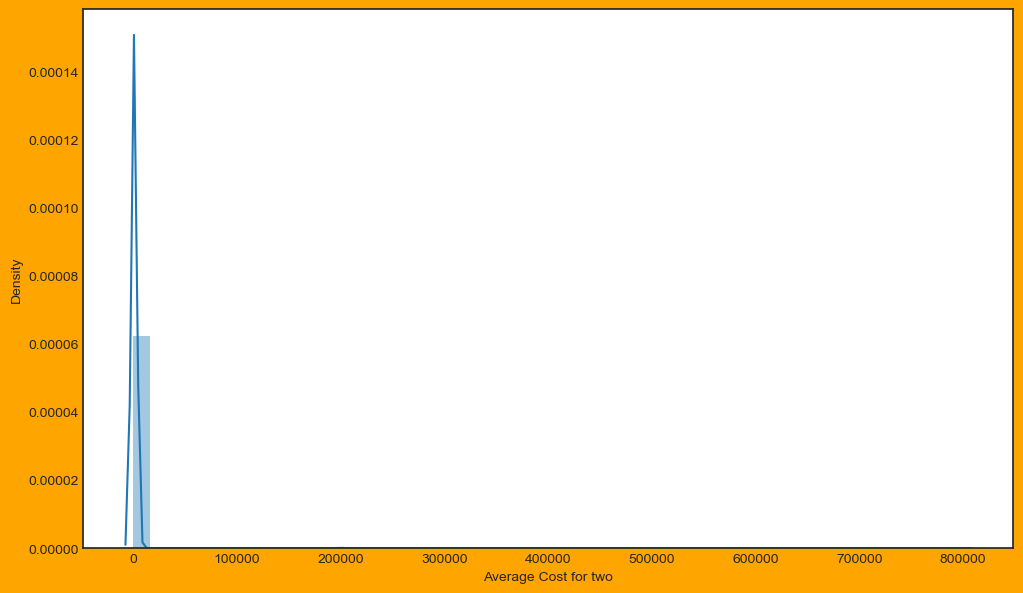

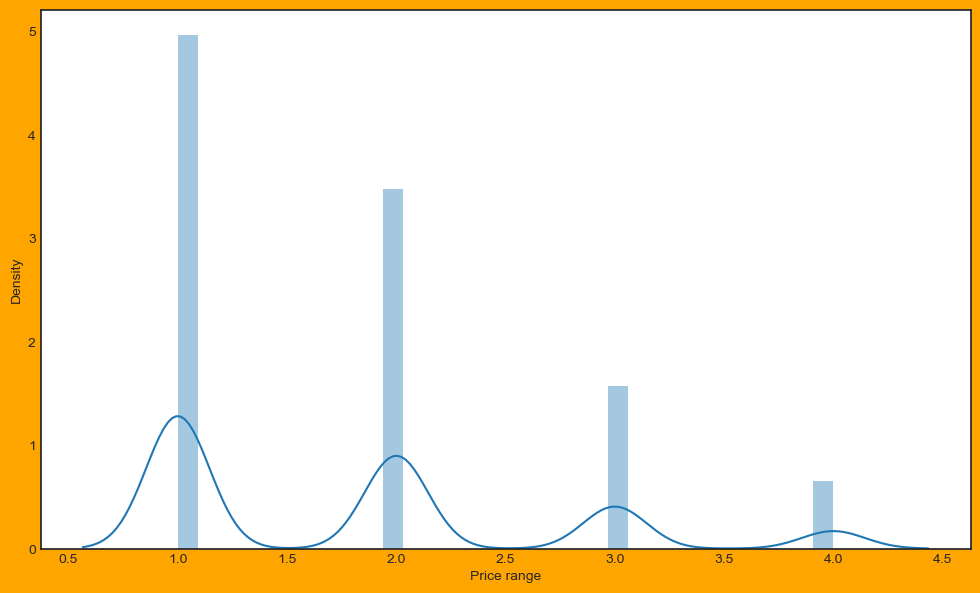

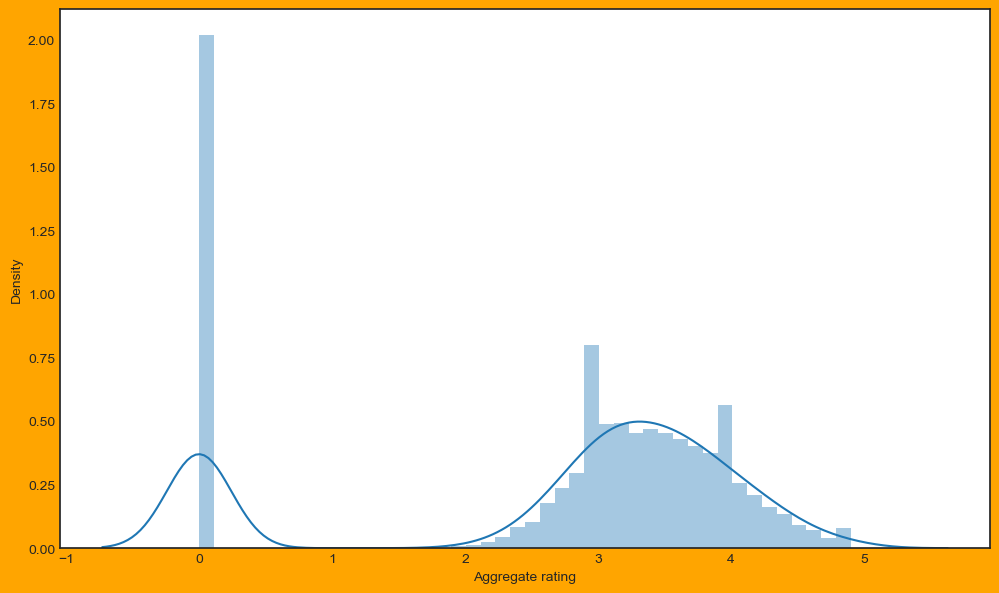

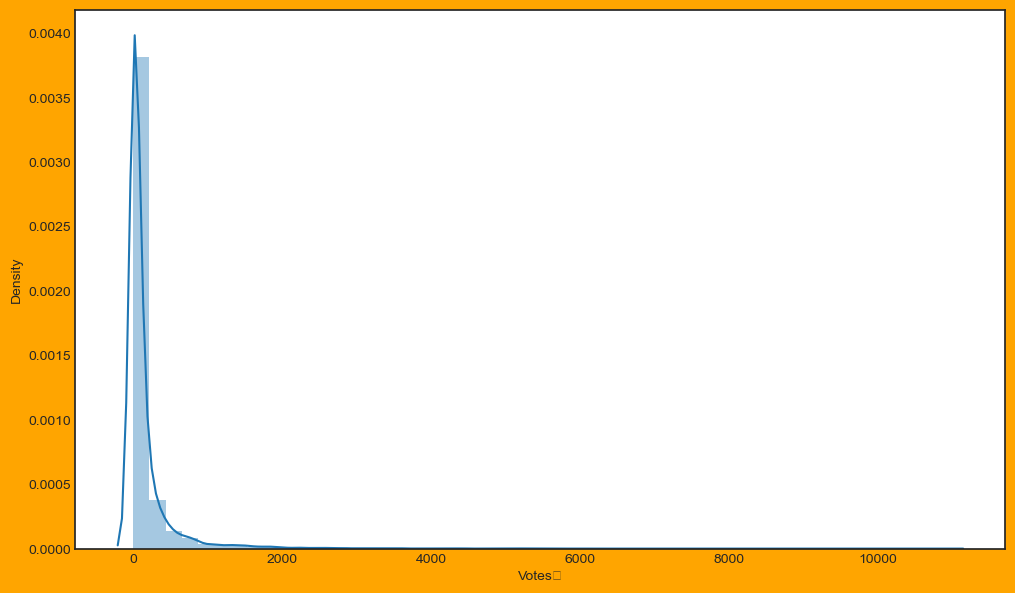

In [45]:
# Checking the distribution of continuous variables:

for i in num_cols:
    plt.figure(figsize=(12,7),facecolor='orange')
    sns.distplot(df[i])
    plt.show()

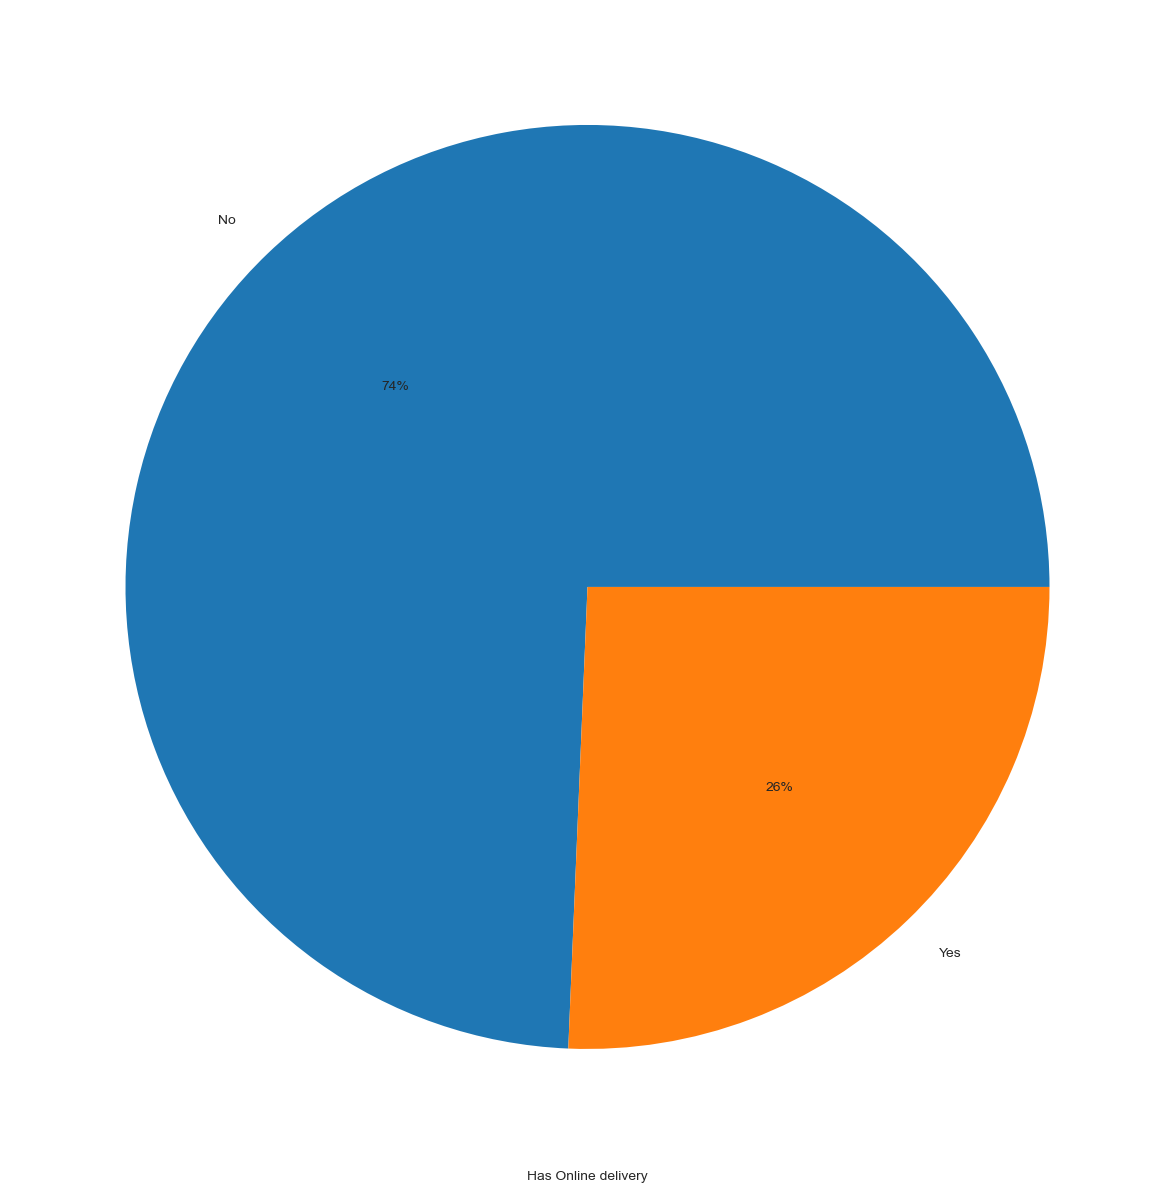

In [46]:
plt.figure(figsize=(15,15))
plt.pie(df['Has Online delivery'].value_counts().values, labels=df['Has Online delivery'].value_counts().index, autopct='%.0f%%')
plt.xlabel('Has Online delivery')
plt.show()

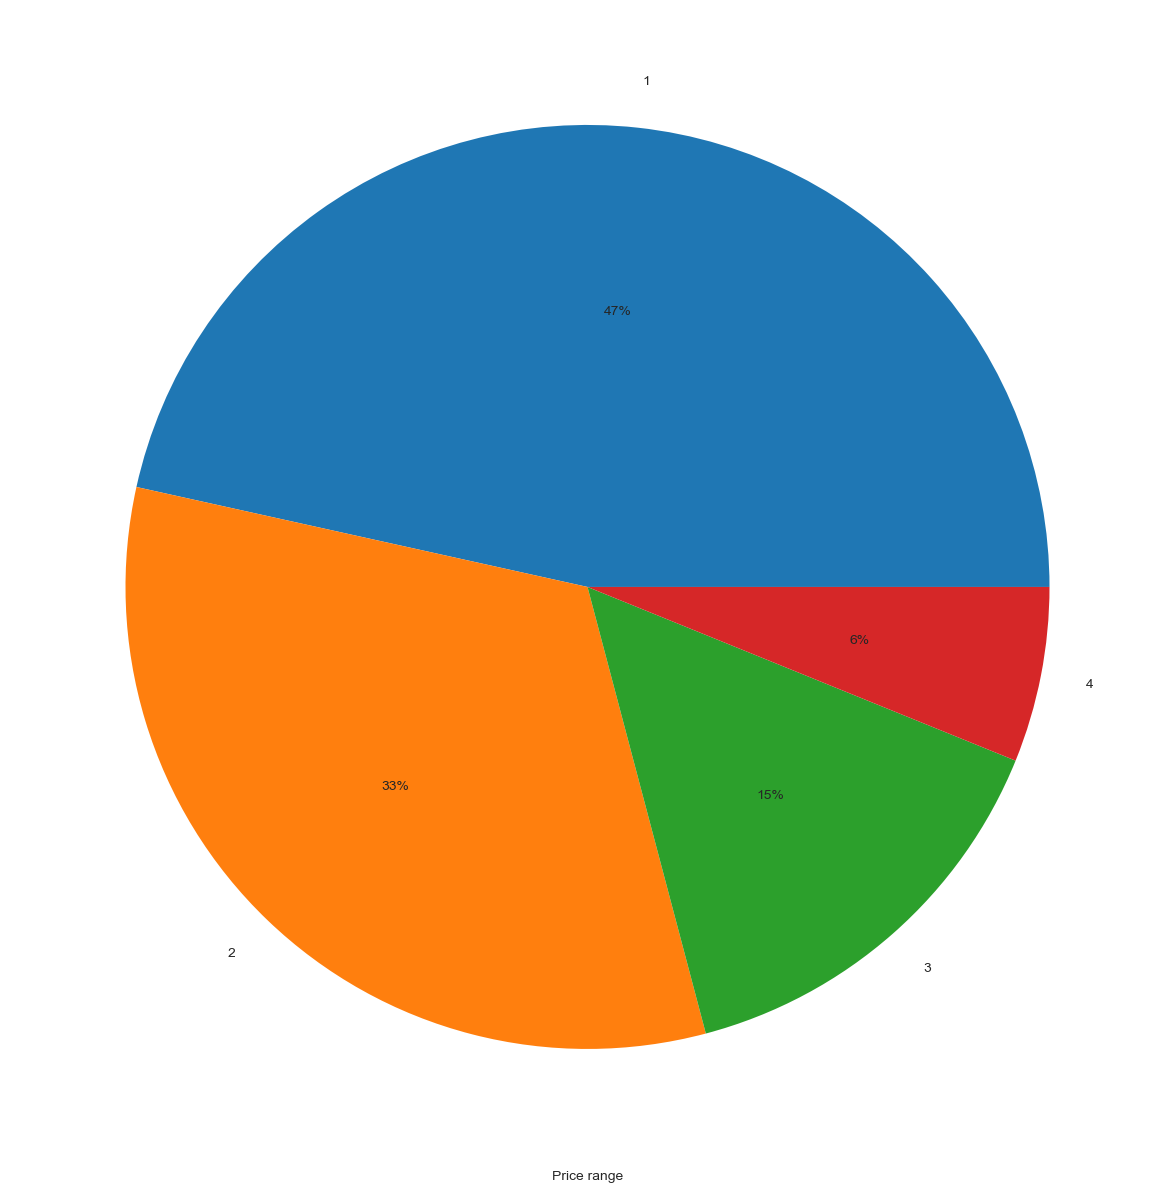

In [47]:
plt.figure(figsize=(15,15))
plt.pie(df['Price range'].value_counts().values, labels=df['Price range'].value_counts().index, autopct='%.0f%%')
plt.xlabel('Price range')
plt.show()

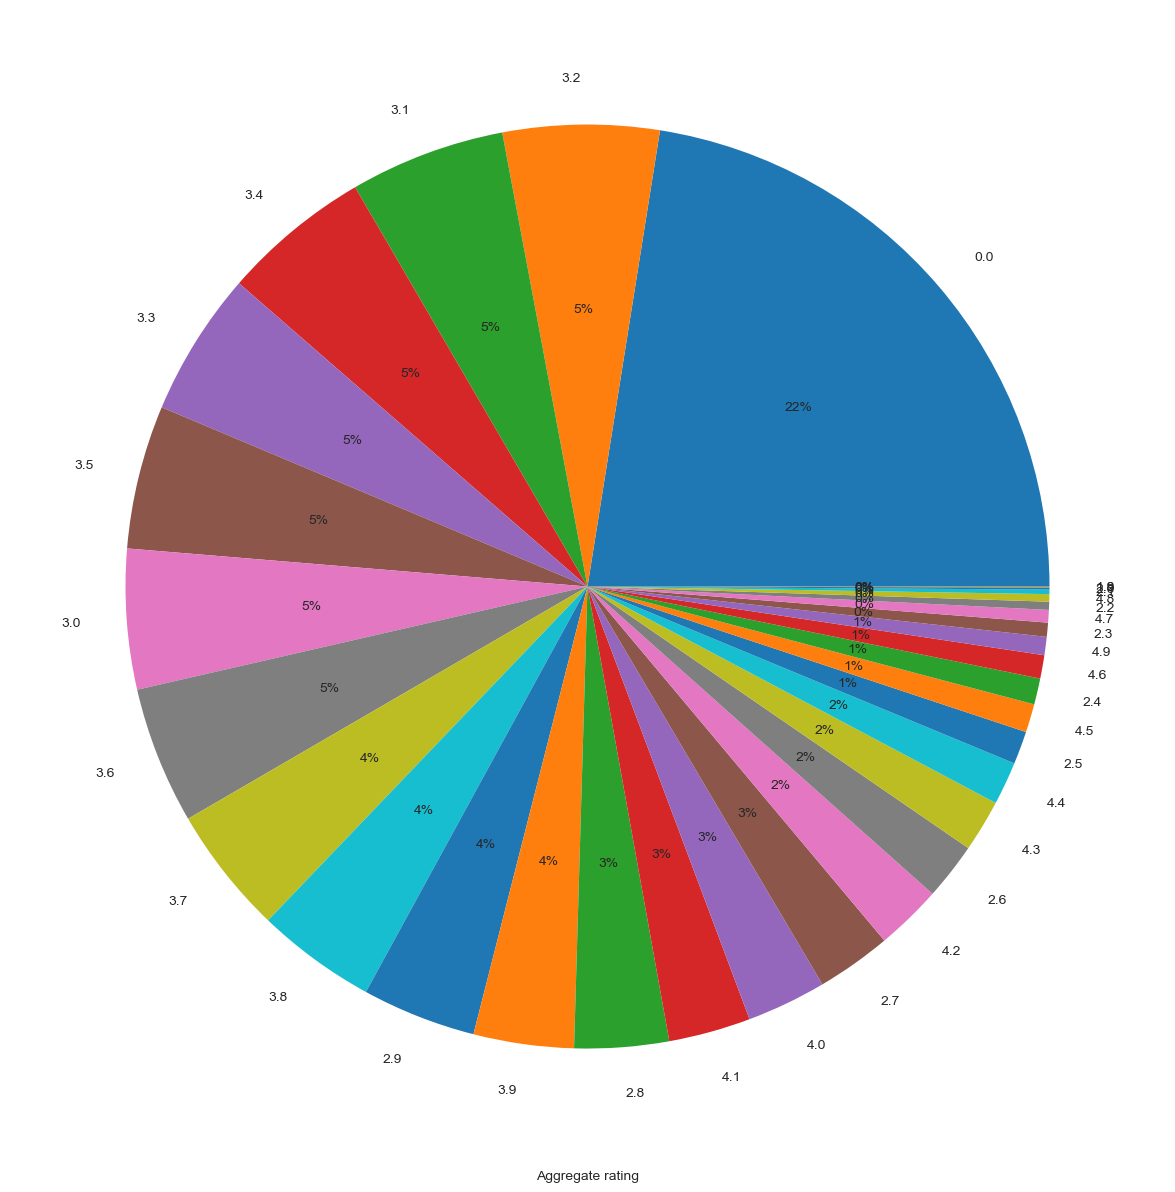

In [48]:
plt.figure(figsize=(15,15))
plt.pie(df['Aggregate rating'].value_counts().values, labels=df['Aggregate rating'].value_counts().index, autopct='%.0f%%')
plt.xlabel('Aggregate rating')
plt.show()

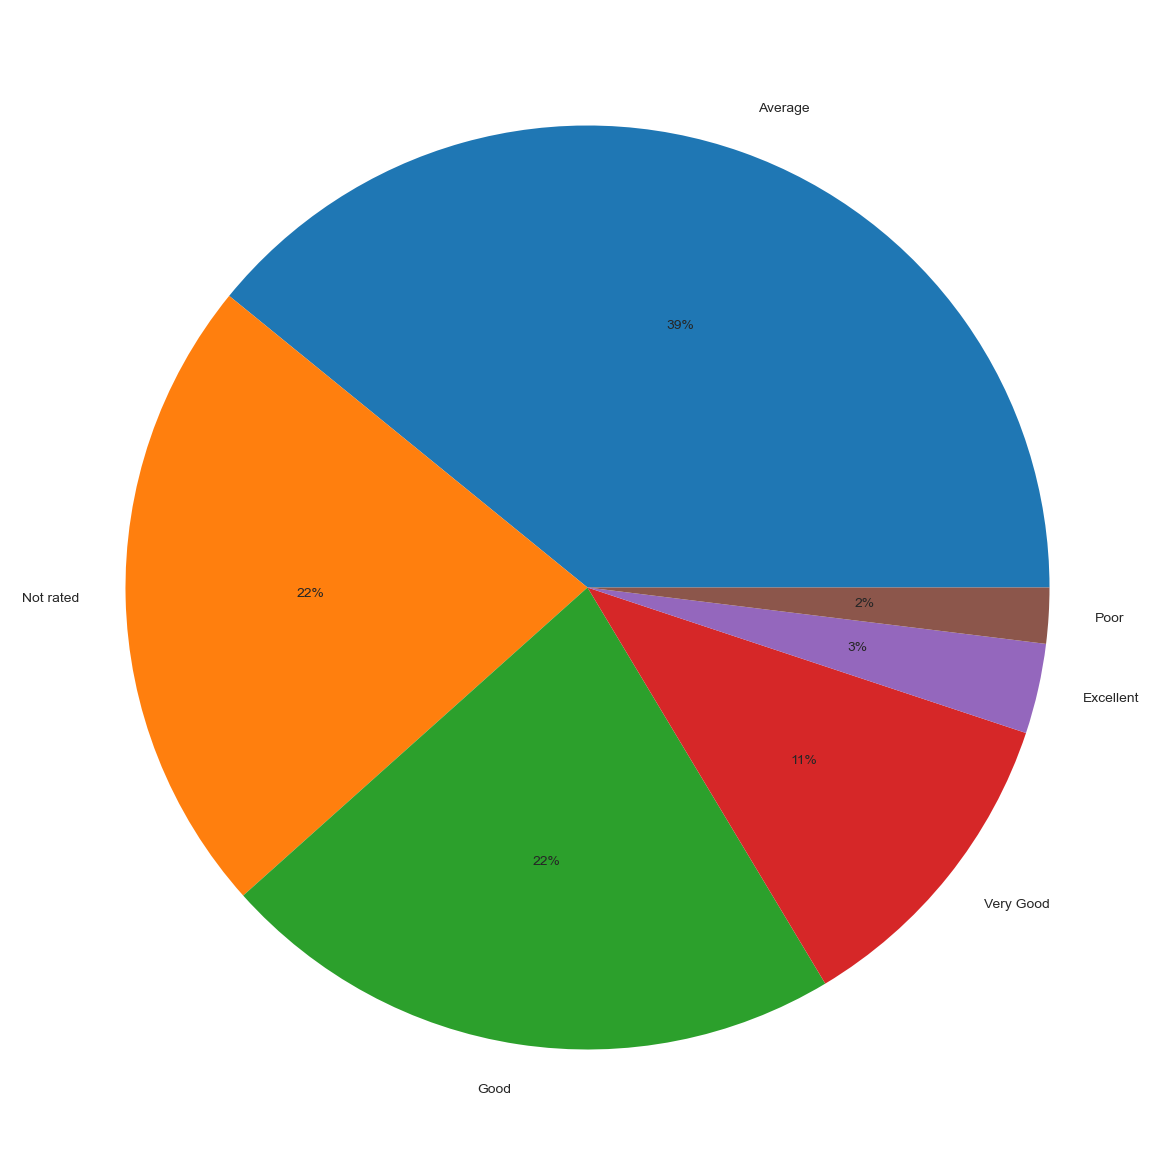

In [49]:
plt.figure(figsize=(15,15))
plt.pie(df['Rating text'].value_counts().values, labels=df['Rating text'].value_counts().index, autopct='%.0f%%')
plt.show()

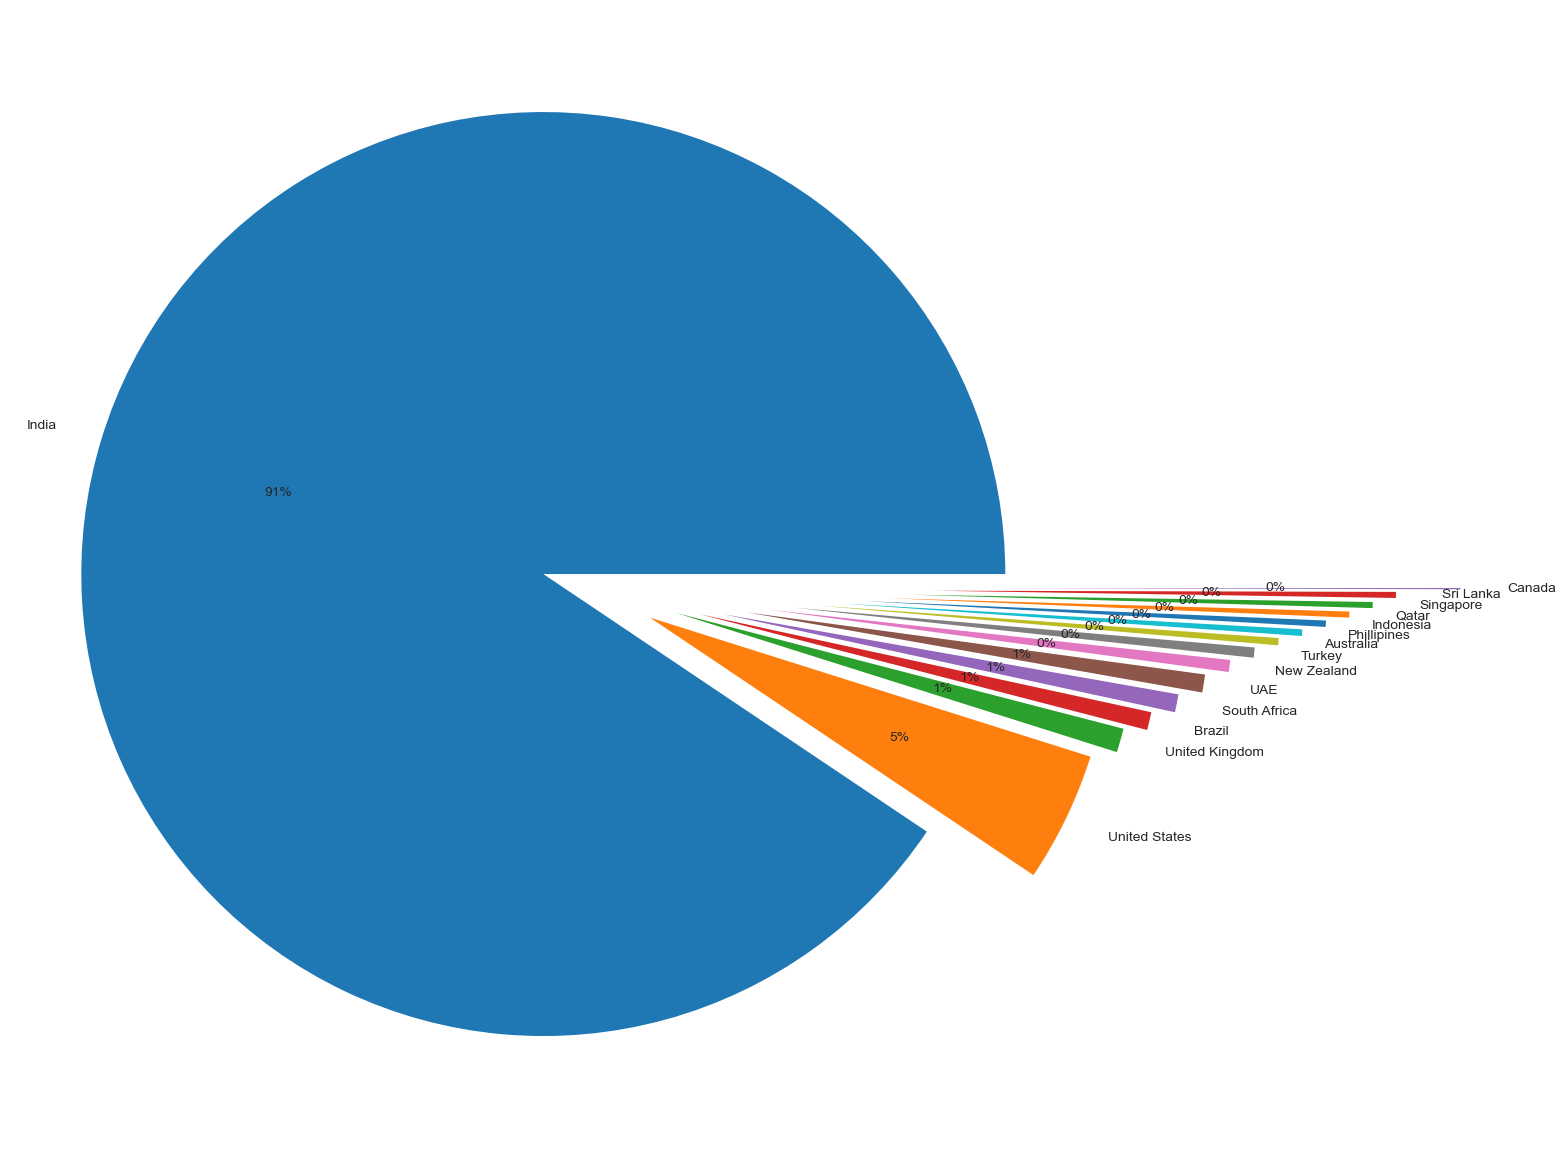

In [50]:
# Univariate analysis:

explode1 = [0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.89]

plt.figure(figsize=(15,15))
plt.pie(df['Country'].value_counts().values, labels=df['Country'].value_counts().index,explode=explode1, autopct='%.0f%%')
plt.show()

<Figure size 1500x1500 with 0 Axes>

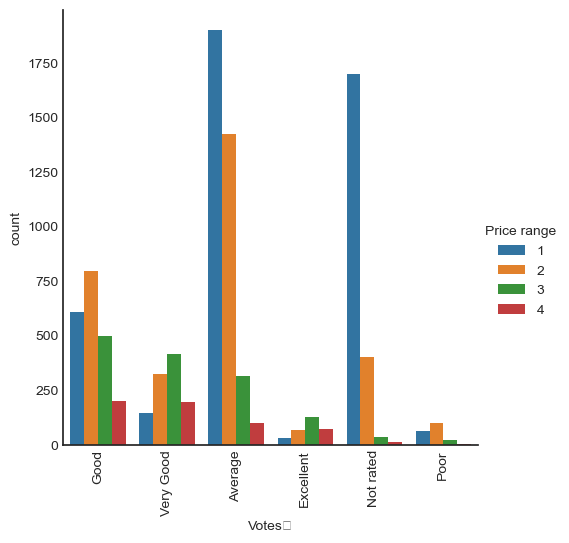

In [51]:
plt.figure(figsize=(15,15))
sns.catplot(x='Rating text', kind="count",hue = 'Price range', data=df)
plt.xlabel(i)
plt.xticks(rotation=90)
plt.show()

<Figure size 1500x1500 with 0 Axes>

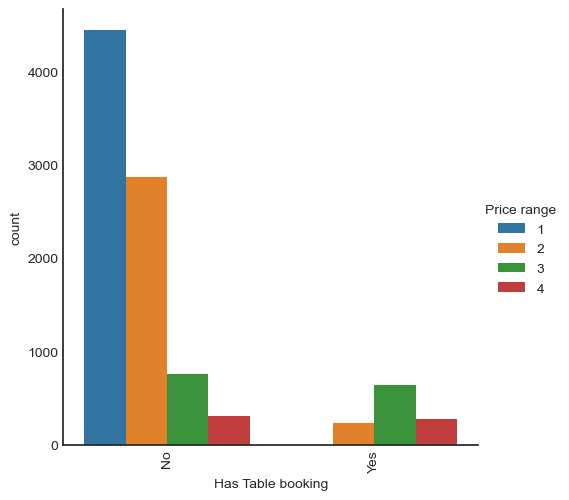

In [52]:
plt.figure(figsize=(15,15))
sns.catplot(x='Has Table booking', kind="count",hue = 'Price range', data=df)
plt.xlabel('Has Table booking')
plt.xticks(rotation=90)
plt.show()

<Figure size 1500x1500 with 0 Axes>

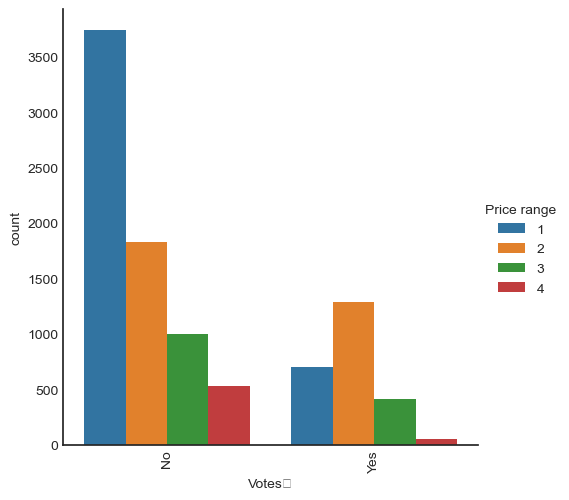

In [53]:
plt.figure(figsize=(15,15))
sns.catplot(x='Has Online delivery', kind="count",hue = 'Price range', data=df)
plt.xlabel(i)
plt.xticks(rotation=90)
plt.show()

<Figure size 2500x2500 with 0 Axes>

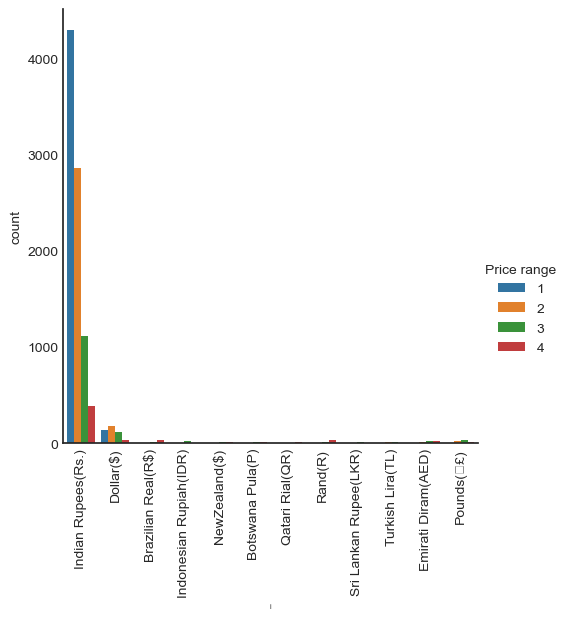

In [54]:
plt.figure(figsize=(25,25))
sns.catplot(x='Currency', kind="count", hue='Price range', data=df)
plt.xlabel('i', fontsize=5)
plt.xticks(rotation=90)
plt.show()


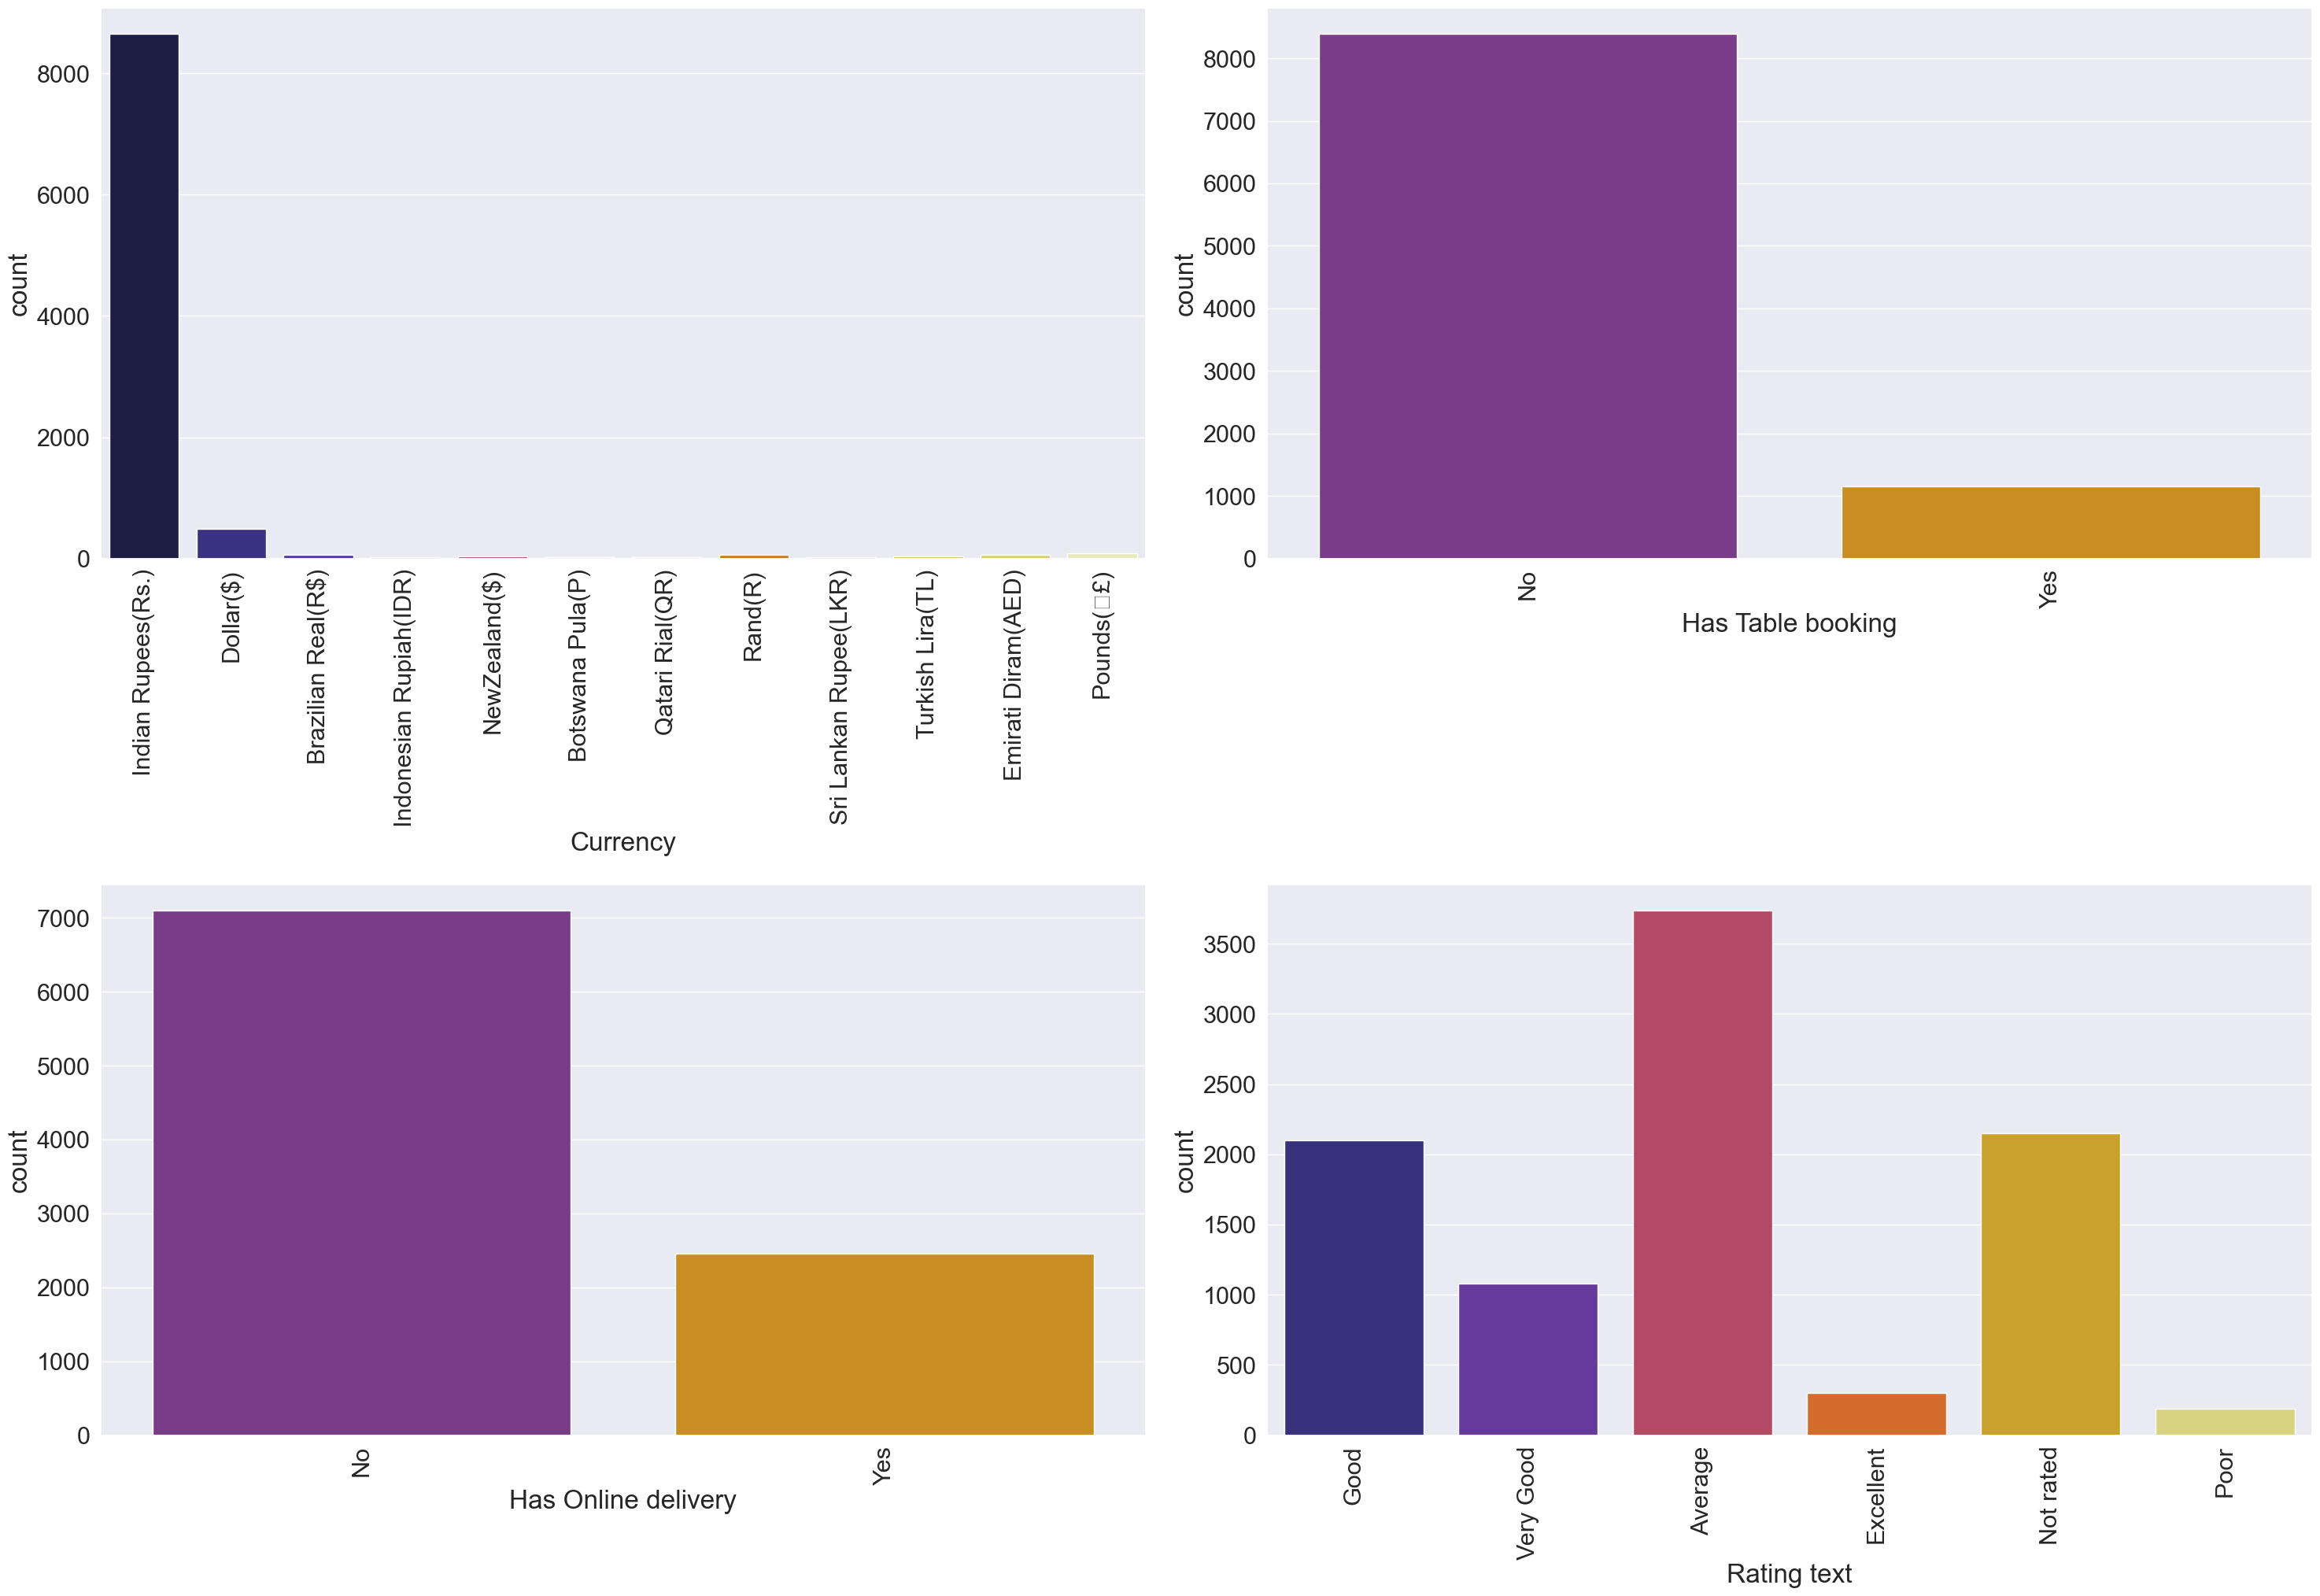

In [55]:
plt.figure(figsize=(30,30))
sns.set(font_scale=2)
p=1
q=1
for i in cat_cols[5:]:
    if p<=5:
        ax=plt.subplot(3,2,p)
        sns.countplot(x=df[i],palette='CMRmap')
        plt.xticks(rotation=90)
        p+=1
plt.tight_layout()

From above graphs we notice the following-
1. India and indian currency(rupees) is present the most in our dataset.
2. Most of the restaurants dont provide table booking.
3. Only few restaurants provide online delivery
4. Most ratings are in the categories- good/ average/ not rated.

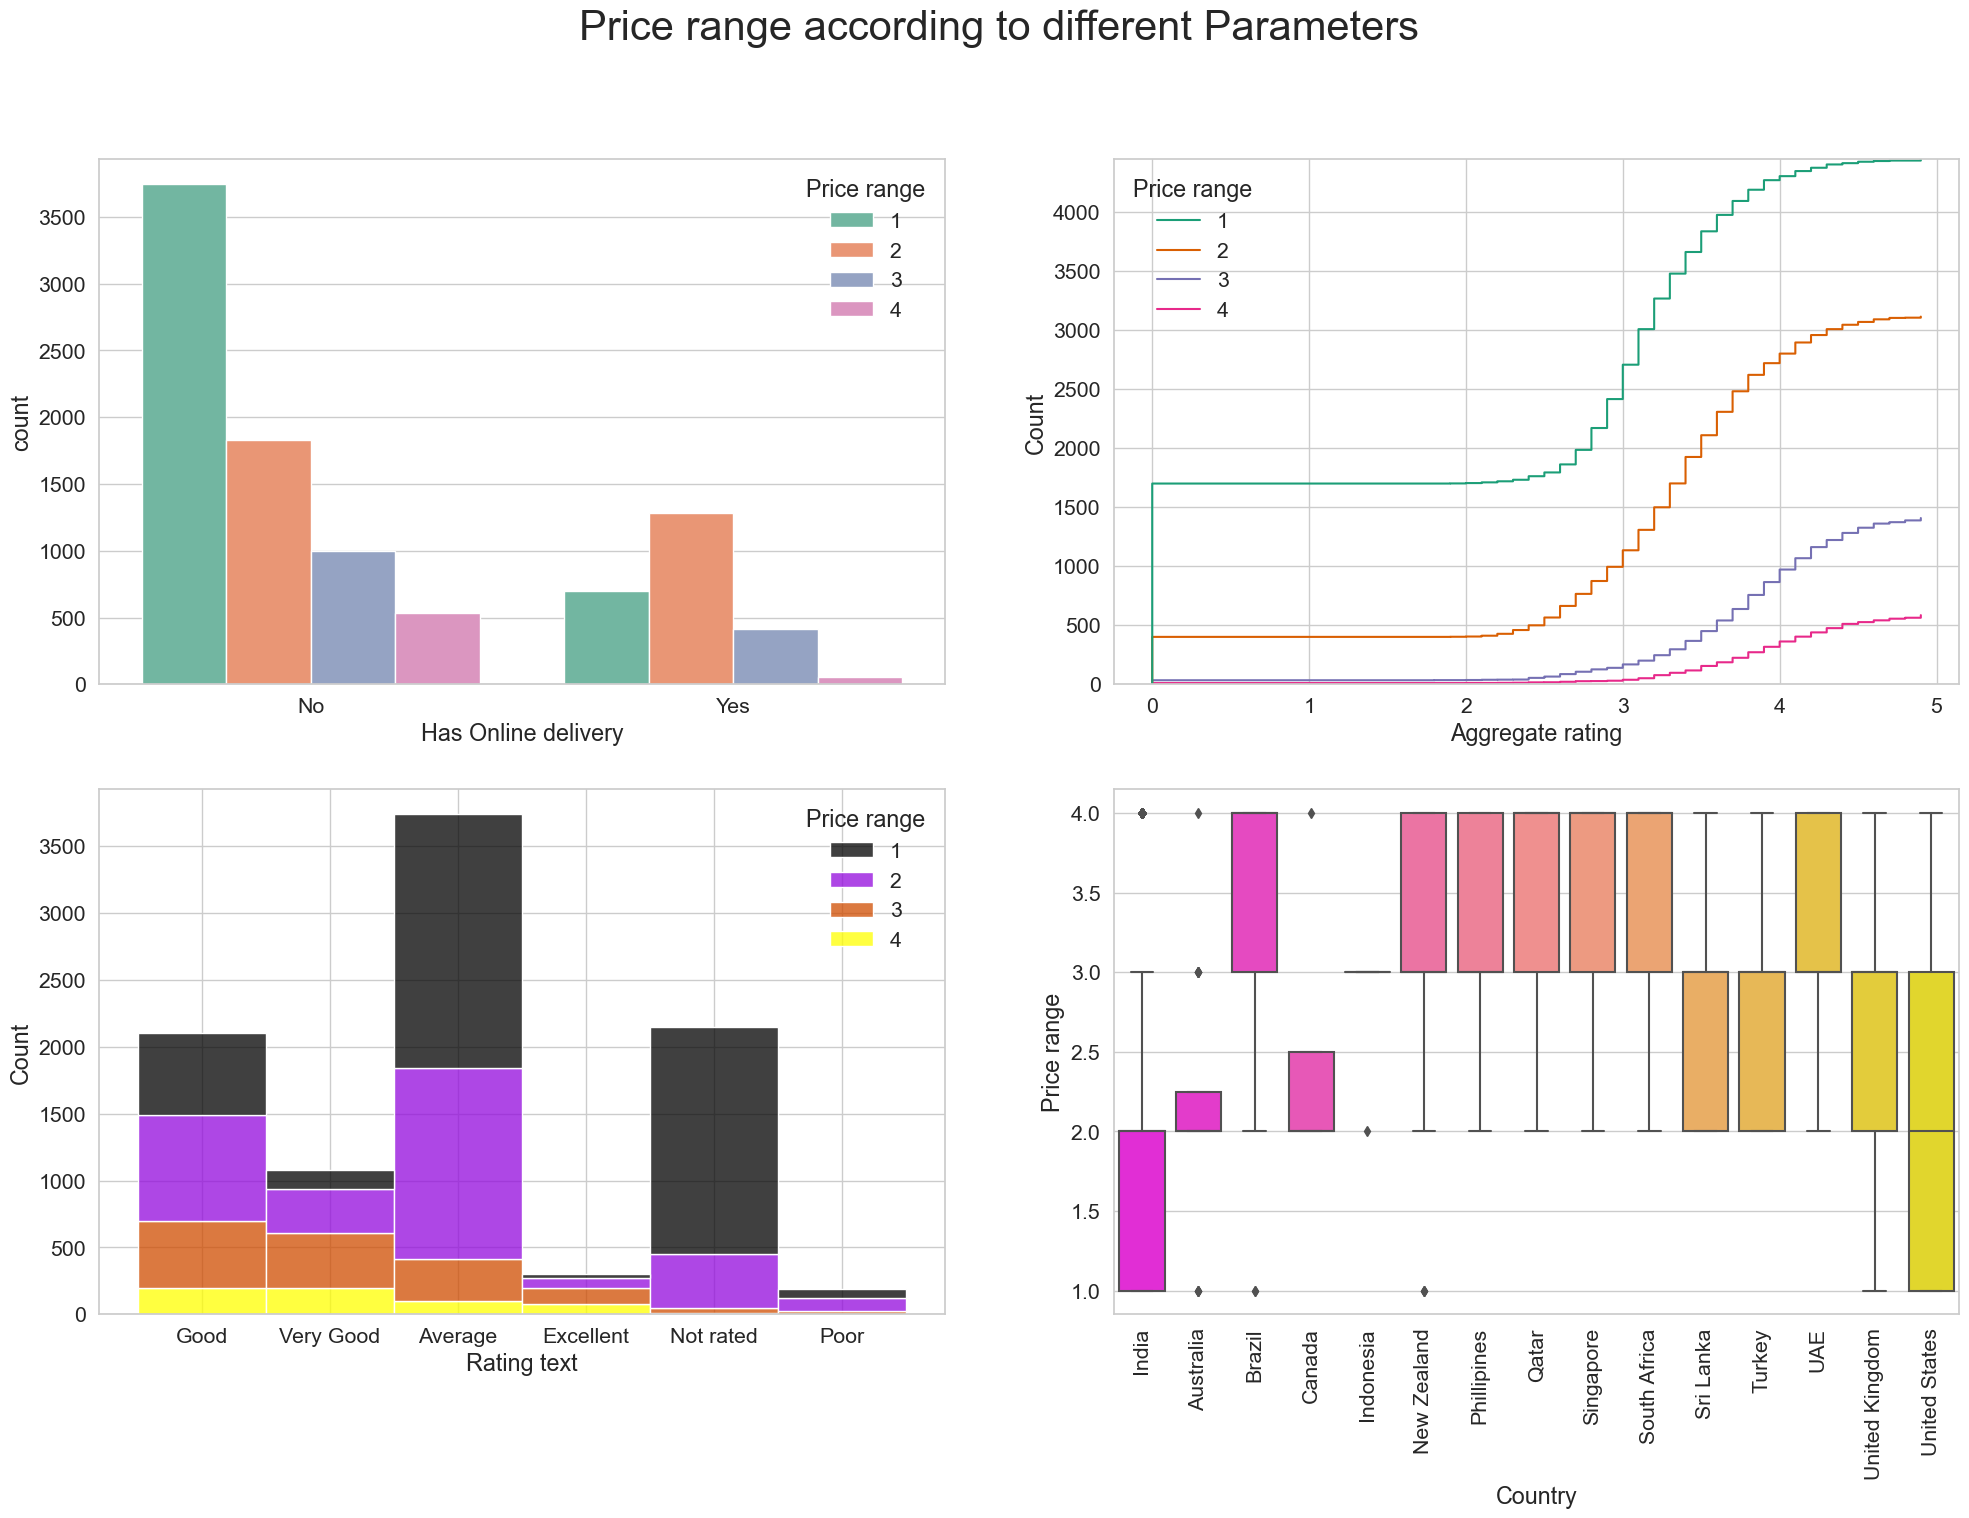

In [56]:
sns.set(font_scale=1.4)
sns.set_style('whitegrid')
fig,axes = plt.subplots(2, 2, figsize=(24,15))
fig.suptitle('Price range according to different Parameters',fontsize=30) 
sns.countplot(ax=axes[0, 0],x='Has Online delivery',hue='Price range',data=df,palette="Set2") 
sns.ecdfplot(ax=axes[0, 1],x='Aggregate rating',hue='Price range', data=df,palette="Dark2",stat='count')
sns.histplot(ax=axes[1, 0],x='Rating text',hue='Price range',data=df,palette="gnuplot",multiple='stack')
sns.boxplot(ax=axes[1, 1],x='Country',y='Price range',data=df,palette="spring")
plt.xticks(rotation=90)
plt.show()

From above graphs we have the following observations-

1. Restaurants with price range of 2-3 are the ones which provide home delivery the most in proportion to their total count.
2. a) Price range of 1 - 2 restaurants are present the most till 2.5 aggregrate ratings, with sharp rise after 2.5 aggregrate ratings 
   b) Price range with 3-4 restaurants are almost negligible till 2.5 and very few till 3 aggregrate ratings but there is rise       after 3-3.5 ag=ffrefrate ratings
3. Restaurants with price ranged 1 are mostly rated as Average and not rated, restaurants with 2 price range are mostly considered Average-Good , while restaurants with 3-4 price range lies between Good to Excellent range.
4. 4th graph shows us how the price range varies with each country. With Phillipines, Brazil, Sinagpore, UAE, Qatar, New Zealand and South Africa have most( acc to IQR) of their restaurants in the price range 3-4 making them the most expensive, India is the one with most(acc to IQR) of their restaurants in the price range 1-2.

### Multivariate Analysis

#### Using Pairplot

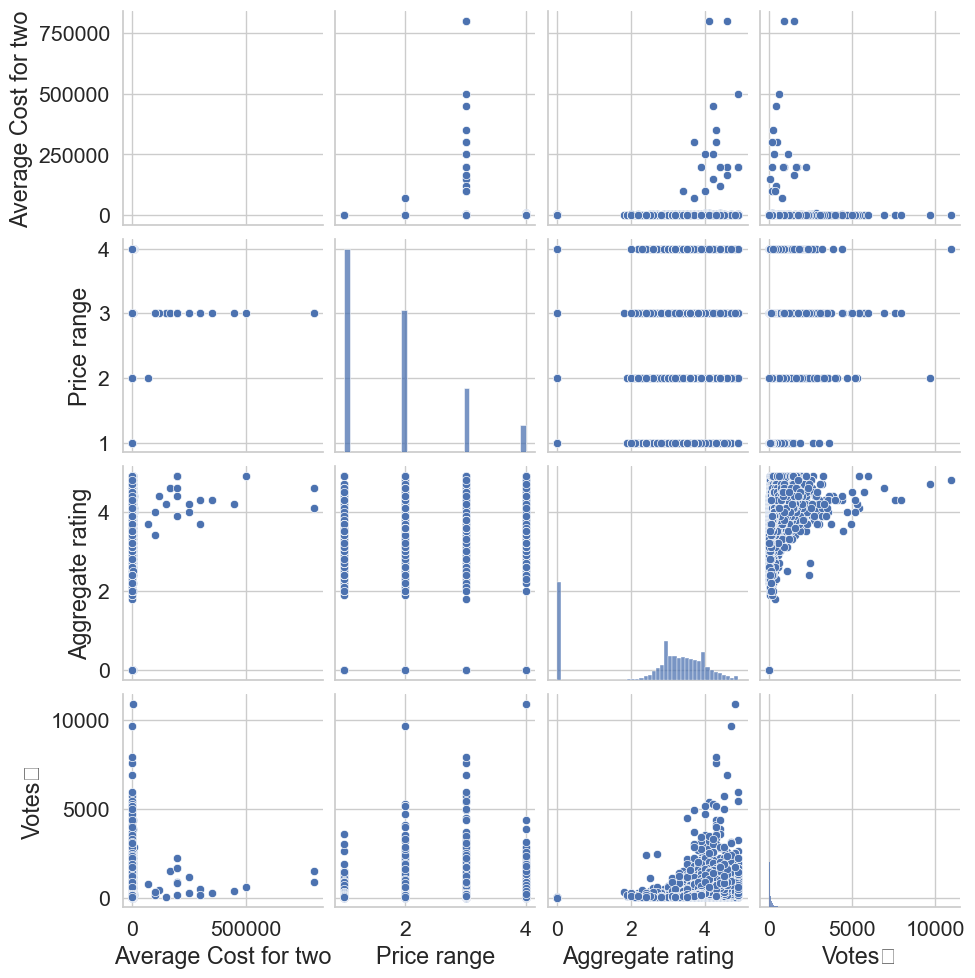

In [57]:
sns.pairplot(df)

## Label Encoding

In [58]:
cat_cols

Index(['Country', 'Restaurant Name', 'Address', 'Locality', 'Cuisines',
       'Currency', 'Has Table booking', 'Has Online delivery', 'Rating text'],
      dtype='object')

In [59]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[cat_cols]=df[cat_cols].apply(le.fit_transform)

In [60]:
df.head(3)

,Country,Restaurant Name,Address,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating text,Votes\r
0,3,3201,4553,17,1514,850,4,0,0,3,3.9,2,140
1,3,5261,4605,17,1514,700,4,0,0,2,3.5,2,71
2,3,6919,6234,17,1306,500,4,0,0,2,3.6,2,94


all the categorial column has been changed into Numerical column

In [61]:
print(f"Shape of our data frame post encoding is", df.shape)
df.isnull().sum()

Shape of our data frame post encoding is (9551, 13)


Country                 0
Restaurant Name         0
Address                 0
Locality                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating text             0
Votes\r                 0
dtype: int64

With the help of shape and isnull method I am taking a look at our data frame values post applying the encoding technique on them. We see that there are no null values present in any of the columns above.

### Correlation

In [62]:
df.corr()

,Country,Restaurant Name,Address,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating text,Votes\r
Country,1.000000,0.017560,-0.235815,-0.118784,-0.127955,-0.004034,-0.105296,-0.062076,-0.140464,0.178035,0.255591,0.203846,0.155161
Restaurant Name,0.017560,1.000000,0.000763,0.004322,0.051679,0.019241,0.009669,0.041173,0.028082,0.061275,0.029367,0.012131,0.018512
Address,-0.235815,0.000763,1.000000,0.159555,0.023944,0.022749,0.069499,0.006428,0.029874,-0.034952,-0.151153,-0.008029,-0.101754
Locality,-0.118784,0.004322,0.159555,1.000000,0.006993,-0.012136,0.023723,-0.065594,-0.030993,-0.114459,-0.174336,-0.036969,-0.123569
Cuisines,-0.127955,0.051679,0.023944,0.006993,1.000000,0.005831,0.068912,0.050639,-0.016639,-0.005350,-0.080331,-0.079979,-0.032719
Average Cost for two,-0.004034,0.019241,0.022749,-0.012136,0.005831,1.000000,0.045615,0.007758,-0.018974,0.075083,0.051792,0.031439,0.067783
Currency,-0.105296,0.009669,0.069499,0.023723,0.068912,0.045615,1.000000,0.000640,0.006991,0.075179,-0.006939,0.014598,-0.027111
Has Table booking,-0.062076,0.041173,0.006428,-0.065594,0.050639,0.007758,0.000640,1.000000,0.101224,0.501925,0.189998,0.044043,0.169422
Has Online delivery,-0.140464,0.028082,0.029874,-0.030993,-0.016639,-0.018974,0.006991,0.101224,1.000000,0.077918,0.225699,-0.080937,0.074303
Price range,0.178035,0.061275,-0.034952,-0.114459,-0.005350,0.075083,0.075179,0.501925,0.077918,1.000000,0.437944,0.164242,0.309444


This gives the correlation between the dependent and independent variables.

In [63]:
df.corr()['Average Cost for two'].sort_values()

Has Online delivery    -0.018974
Locality               -0.012136
Country                -0.004034
Cuisines                0.005831
Has Table booking       0.007758
Restaurant Name         0.019241
Address                 0.022749
Rating text             0.031439
Currency                0.045615
Aggregate rating        0.051792
Votes\r                 0.067783
Price range             0.075083
Average Cost for two    1.000000
Name: Average Cost for two, dtype: float64

### Observation 
- All columns are sorted in ascending order showing least to strong correlation with target column.
- `3` columns are negatively correlated and `11` columns are positively correlated.
- Columm `Price range ` is highly correlated with Target column 'Average Cost for two' and  column `has online delivery`  correlated with Target column 'Average Cost for two'

## Visualizing the correlation matrix by plotting heat map.

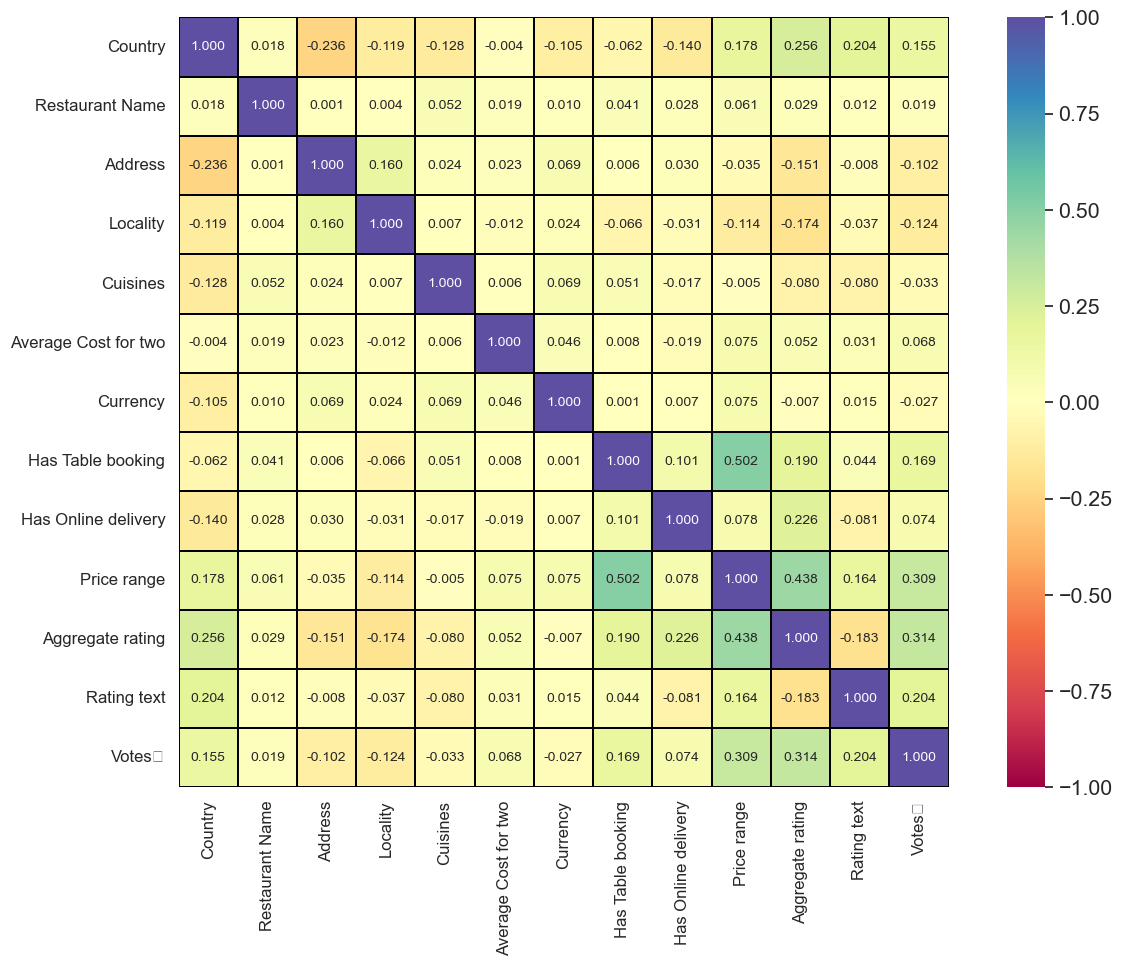

In [64]:
lower_triangle = np.tril(df.corr())
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),linewidths=.1,linecolor='black', vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="Spectral")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### Checking correlation with barplot

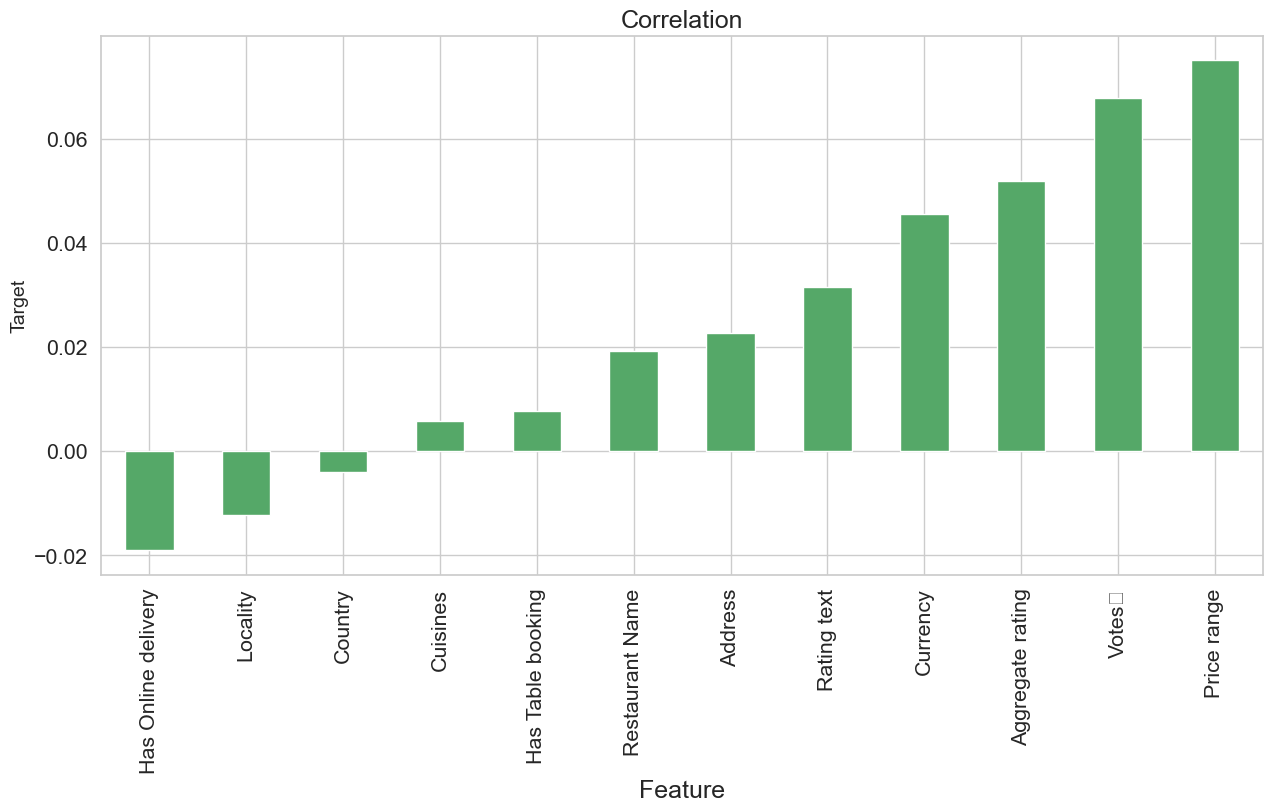

In [65]:
plt.figure(figsize=(15,7))
df.corr()['Average Cost for two'].sort_values(ascending=True).drop(['Average Cost for two']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=18)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

##### Outcome:
- Here we can see "price range" is least but positively correletaed with Target Column and "Has Online delivery" is highly but negatively correletaed with Target Column. 


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               9551 non-null   int32  
 1   Restaurant Name       9551 non-null   int32  
 2   Address               9551 non-null   int32  
 3   Locality              9551 non-null   int32  
 4   Cuisines              9551 non-null   int32  
 5   Average Cost for two  9551 non-null   int64  
 6   Currency              9551 non-null   int32  
 7   Has Table booking     9551 non-null   int32  
 8   Has Online delivery   9551 non-null   int32  
 9   Price range           9551 non-null   int64  
 10  Aggregate rating      9551 non-null   float64
 11  Rating text           9551 non-null   int32  
                9551 non-null   int64  
dtypes: float64(1), int32(9), int64(3)
memory usage: 966.9 KB


## Checking Outliers

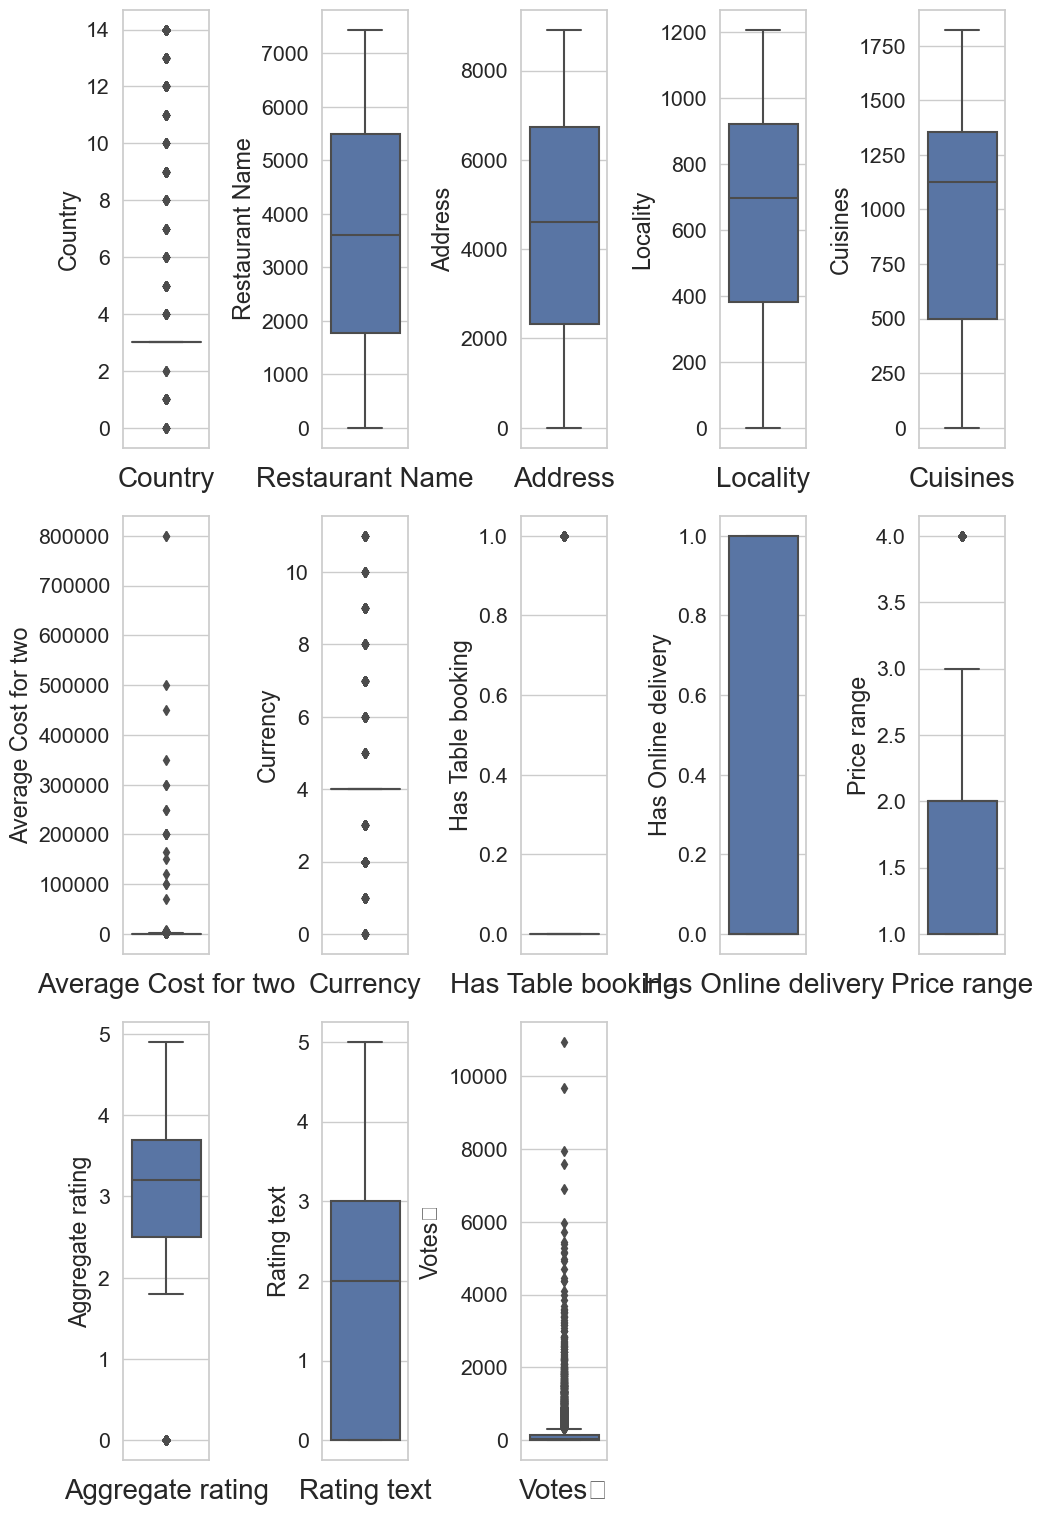

In [67]:
plt.figure(figsize=(10,15), facecolor='white')
plotnumber = 1
#features = df.drop("primary_fuel", axis=1)
for column in df.columns: #column in features:
    if plotnumber<=13:
        ax = plt.subplot(3,5,plotnumber)
        sns.boxplot(y=column, data=df)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

### Observation:

We can see that many column having outliers and we process it to the model
       

### Removing Outliers using Zscore

In [68]:
from scipy.stats import zscore
z=np.abs(zscore(df))
thershold=3
df_new=df[(z<3).all(axis=1)]
df_new.head()

,Country,Restaurant Name,Address,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating text,Votes\r
0,3,3201,4553,17,1514,850,4,0,0,3,3.9,2,140
1,3,5261,4605,17,1514,700,4,0,0,2,3.5,2,71
2,3,6919,6234,17,1306,500,4,0,0,2,3.6,2,94
3,3,1637,100,204,1645,400,4,0,0,2,4.0,5,87
4,3,4922,1316,204,1373,1000,4,0,0,3,4.2,5,177


In [69]:
print("Old DataFrame data in Rows and Column:",df.shape)
print("New DataFrame data in Rows and Column:",df_new.shape)
print("Total Dropped rows:",df.shape[0]-df_new.shape[0])
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df_new.shape[0])/df.shape[0]*100)

Old DataFrame data in Rows and Column: (9551, 13)
New DataFrame data in Rows and Column: (8590, 13)
Total Dropped rows: 961
Percentage of data loss post outlier removal:  10.061773636268454


### Percentage Data Loss using Zscore is 10% so acceptable.

Data loss can be bear

## Checking for the skewness

In [70]:
df_new.skew().sort_values()

Aggregate rating       -0.881131
Currency               -0.870838
Cuisines               -0.345319
Locality               -0.310243
Address                -0.117849
Restaurant Name         0.046455
Rating text             0.431043
Has Online delivery     1.004879
Price range             1.026645
Has Table booking       2.305305
Votes\r                 3.665666
Average Cost for two    3.694009
Country                 7.601446
dtype: float64

In [71]:
cat_cols

Index(['Country', 'Restaurant Name', 'Address', 'Locality', 'Cuisines',
       'Currency', 'Has Table booking', 'Has Online delivery', 'Rating text'],
      dtype='object')

In [72]:
num_cols

['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes\r']

### Observation:
- Skewness threshold taken is +/-0.50
- Columns which are having skewness: Has Online delivery,Price range,Has Table booking,Votes\r,Average Cost for two,Country.
- The Aggregate rating,Currency column data is negatively highly skewed and country is positively highly skewed
- All the columns are not normallly distributed, they are skewed.
- Since  Has Online delivery,Has Table booking,Country are  categorical column so we will not remove skewness from them and ""price range" Target Column so we will not remove skewness. 
- Only we will remove skewness from column contains continuous data.

### Checking skweness through Data Visualization

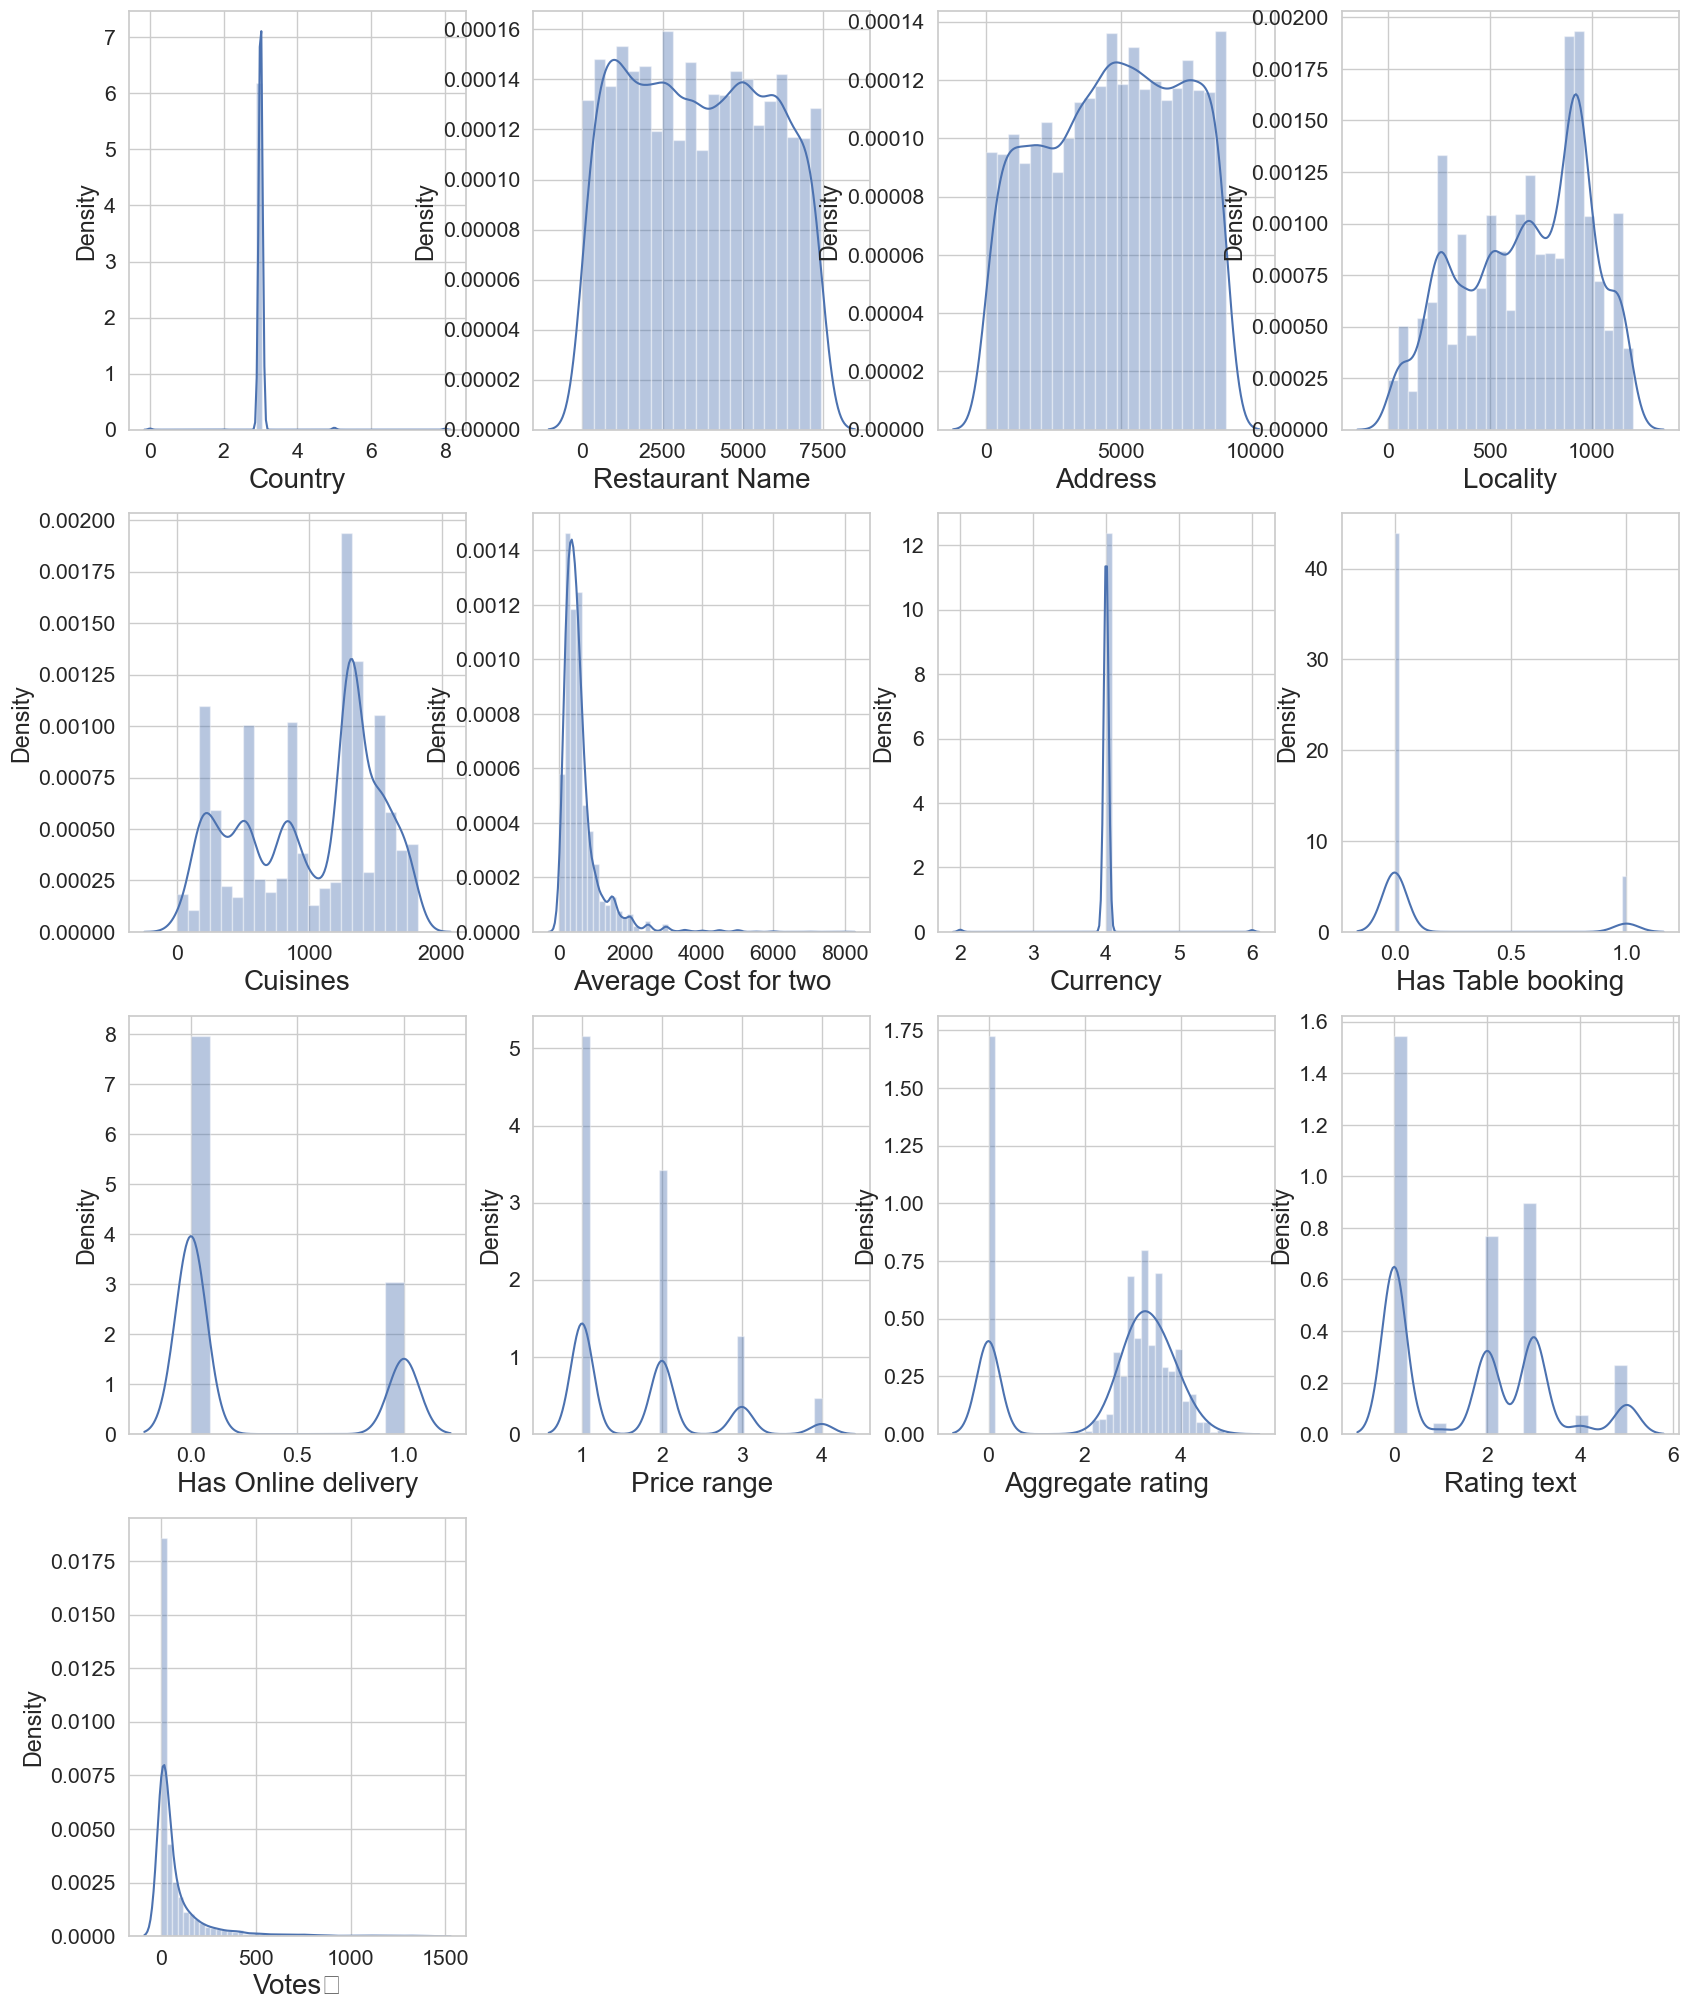

In [73]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df_new:
    if plotnumber<=13:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### Removing skewnes

In [74]:
from sklearn.preprocessing import PowerTransformer

In [75]:
collist = ['Has Online delivery','Has Table booking']
pt = PowerTransformer(method='yeo-johnson')
df_new[collist] = pt.fit_transform(df_new[collist])
df_new[collist]

,Has Online delivery,Has Table booking
0,-0.616736,-0.373374
1,-0.616736,-0.373374
2,-0.616736,-0.373374
3,-0.616736,-0.373374
4,-0.616736,-0.373374
...,...,...
8858,-0.616736,-0.373374
8859,-0.616736,-0.373374
8860,-0.616736,-0.373374
8861,-0.616736,-0.373374


### checking skewness after removal

In [76]:
df_new.skew().sort_values()

Aggregate rating       -0.881131
Currency               -0.870838
Cuisines               -0.345319
Locality               -0.310243
Address                -0.117849
Restaurant Name         0.046455
Rating text             0.431043
Has Online delivery     1.004879
Price range             1.026645
Has Table booking       2.305305
Votes\r                 3.665666
Average Cost for two    3.694009
Country                 7.601446
dtype: float64

In [77]:
cat_cols

Index(['Country', 'Restaurant Name', 'Address', 'Locality', 'Cuisines',
       'Currency', 'Has Table booking', 'Has Online delivery', 'Rating text'],
      dtype='object')

In [78]:
collist = ['Votes\r','Average Cost for two']
pt = PowerTransformer(method='yeo-johnson')
df_new[collist] = pt.fit_transform(df_new[collist])
df_new[collist]

,Votes\r,Average Cost for two
0,0.977911,0.812403
1,0.619054,0.550638
2,0.766607,0.109013
3,0.725802,-0.175643
4,1.103222,1.035495
...,...,...
8858,0.207235,-2.345922
8859,0.174451,-1.859995
8860,0.139516,-2.531801
8861,0.252915,-2.753929


In [79]:
df_new.skew().sort_values()

Aggregate rating       -0.881131
Currency               -0.870838
Cuisines               -0.345319
Locality               -0.310243
Address                -0.117849
Votes\r                -0.009657
Restaurant Name         0.046455
Average Cost for two    0.059215
Rating text             0.431043
Has Online delivery     1.004879
Price range             1.026645
Has Table booking       2.305305
Country                 7.601446
dtype: float64

skewness removed

## Data preprocessing

### Separating the features and label variables into x and y

In [80]:
x=df_new.drop("Price range",axis=1)
y=df_new["Price range"]

In [81]:
x.columns

Index(['Country', 'Restaurant Name', 'Address', 'Locality', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Aggregate rating', 'Rating text', 'Votes\r'],
      dtype='object')

In [82]:
x.shape,y.shape

((8590, 12), (8590,))

In [83]:
y.value_counts()

1    4296
2    2846
3    1056
4     392
Name: Price range, dtype: int64

The data is not balanced. So, we will use oversampling method to balance it.

## Oversampling using the SMOTE

In [84]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [85]:
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [86]:
y.value_counts()

3    4296
2    4296
4    4296
1    4296
Name: Price range, dtype: int64

After using oversampling method, we check that now our data is balanced.

<AxesSubplot:xlabel='Price range', ylabel='count'>

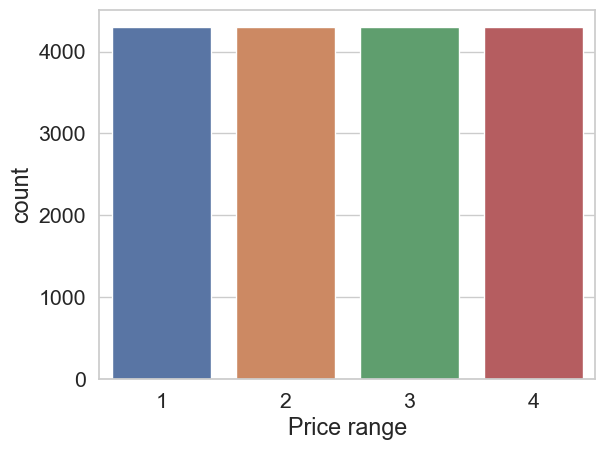

In [87]:
#checking through visualization also
sns.countplot(y)

Now, our data is balanced.

## Scaling data using Standard Scaler

In [88]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [89]:
x.head()

,Country,Restaurant Name,Address,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Aggregate rating,Rating text,Votes\r
0,-0.101159,-0.258007,-0.064569,-2.107939,1.071249,0.078418,0.062623,-0.731803,-0.631305,0.714845,0.194486,0.625278
1,-0.101159,0.688485,-0.044564,-2.107939,1.071249,-0.133823,0.062623,-0.731803,-0.631305,0.404237,0.194486,0.244586
2,-0.101159,1.450273,0.582134,-2.107939,0.626322,-0.491894,0.062623,-0.731803,-0.631305,0.481889,0.194486,0.401117
3,-0.101159,-0.976605,-1.777697,-1.496013,1.351467,-0.722695,0.062623,-0.731803,-0.631305,0.792497,2.127426,0.357829
4,-0.101159,0.532728,-1.309886,-1.496013,0.769640,0.259303,0.062623,-0.731803,-0.631305,0.947801,2.127426,0.758213


## Variance Threshold Method

It removes all features which variance doesn't meet some threshold. By default, it removes all zero-variance features.

## SelectKBest method

In [90]:
from sklearn.feature_selection import  SelectKBest, f_classif

In [91]:
best_fit = SelectKBest(score_func = f_classif, k ='all')
fit = best_fit.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [92]:
fit = best_fit.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(12,'Score'))

                 Feature         Score
5   Average Cost for two  11781.065386
7      Has Table booking   4061.669952
11               Votes\r   3308.736815
9       Aggregate rating   2172.087503
8    Has Online delivery    829.807164
3               Locality    199.781122
2                Address    188.561276
0                Country    167.170019
10           Rating text    164.524918
1        Restaurant Name     32.170826
6               Currency     25.051123
4               Cuisines      6.812947


Now, we have completed features selection process through using this techniques. So, will check for multicolinearity now.

## Checking for Multicolinearity

### VIF (Variance Inflation factor)

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [94]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.084766,Country
1,1.007314,Restaurant Name
2,1.159039,Address
3,1.087427,Locality
4,1.020463,Cuisines
5,2.275284,Average Cost for two
6,1.047444,Currency
7,1.790241,Has Table booking
8,1.122491,Has Online delivery
9,3.885005,Aggregate rating


__No Multi-collinearaity is present in columns. So, we will create model now.__

# Creating Model

#### Finding the best random state among all the models

In [95]:
models=[RandomForestClassifier(),DecisionTreeClassifier()]

In [96]:
maxAcc = 0
maxRS = 0

for i in range(1,50):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state=i)
    for m in models:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        pred = m.predict(x_test)
        acc = accuracy_score(y_test,pred)
        if acc>maxAcc:
            maxAcc = acc
            maxRs=i
print("Best Accuracy is:", maxAcc, "on Random State:", maxRs)

Best Accuracy is: 0.9794414274631498 on Random State: 38


In [97]:
models=[GaussianNB(),LogisticRegression(),RandomForestClassifier(),KNeighborsClassifier(),DecisionTreeClassifier(), SVC()]

In [108]:
 x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state=38)

In [109]:
x.shape, y.shape

((17184, 12), (17184,))

In [110]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((12028, 12), (12028,), (5156, 12), (5156,))

We can see the x.shape value is divided into x_train.shape and x_test.shape and like this y.shape is also divided. We will understand this by Classification problem.

## Models with their metrics

In [111]:
for m in models:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('\033[1m','For' ,m,'\033[0m','Accuracy score is: ',accuracy_score(y_test,predm))
    print ('\n','Confusion matrix:','\n',confusion_matrix(y_test,predm))
    print ('\n','Classification Report:','\n',classification_report(y_test,predm))
    cvs=cross_val_score(m,x,y)
    print('Cross Validation Score=',cvs.mean(),'\n')
    print('*'*100)

 For GaussianNB()  Accuracy score is:  0.5929014740108611

 Confusion matrix: 
 [[1283    0    1    0]
 [1129   35   89   16]
 [ 302   47  830   91]
 [ 144    1  279  909]]

 Classification Report: 
               precision    recall  f1-score   support

           1       0.45      1.00      0.62      1284
           2       0.42      0.03      0.05      1269
           3       0.69      0.65      0.67      1270
           4       0.89      0.68      0.77      1333

    accuracy                           0.59      5156
   macro avg       0.61      0.59      0.53      5156
weighted avg       0.62      0.59      0.53      5156

Cross Validation Score= 0.6570024959498818 

****************************************************************************************************
 For LogisticRegression()  Accuracy score is:  0.8634600465477114

 Confusion matrix: 
 [[1155  129    0    0]
 [  57 1076  136    0]
 [  19   94 1048  109]
 [  27   11  122 1173]]

 Classification Report: 
            

### so, RandomForestClassifier()  getting best score in Accuracy: 97.69%

### Confusion Matrix for RFC

Text(0.5, 1.0, 'RFC prediction Confusion_matrix')

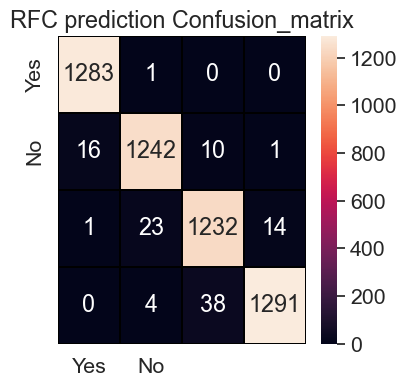

In [112]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
pred_rfc = rfc.predict(x_test)

cm = confusion_matrix(y_test,pred_rfc)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("RFC prediction Confusion_matrix")

## Hyper parameter tuning for best model using GridsearchCV

In [113]:
from sklearn.metrics import make_scorer, precision_score, recall_score

In [114]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state = 38)
rfc=RandomForestClassifier(random_state=38)
param={'max_features':['auto','sqrt','log2'],
      'max_depth':(10,20,50),
      'criterion':['gini','entropy']}
gss=GridSearchCV(rfc,param,cv=5)
gss.fit(x_train,y_train)
gss.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'max_features': 'auto'}

In [115]:
final_model=RandomForestClassifier(random_state=38, max_features='auto', max_depth=20, criterion='entropy')
final_model.fit(x_train, y_train)
fmod_pred = final_model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 97.86656322730799


### after hyper parameter tuning , accuracy will reach to 97.86%

In [119]:
x.head(3)

,Country,Restaurant Name,Address,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Aggregate rating,Rating text,Votes\r
0,-0.101159,-0.258007,-0.064569,-2.107939,1.071249,0.078418,0.062623,-0.731803,-0.631305,0.714845,0.194486,0.625278
1,-0.101159,0.688485,-0.044564,-2.107939,1.071249,-0.133823,0.062623,-0.731803,-0.631305,0.404237,0.194486,0.244586
2,-0.101159,1.450273,0.582134,-2.107939,0.626322,-0.491894,0.062623,-0.731803,-0.631305,0.481889,0.194486,0.401117


In [120]:
df.head(3)

,Country,Restaurant Name,Address,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating text,Votes\r
0,3,3201,4553,17,1514,850,4,0,0,3,3.9,2,140
1,3,5261,4605,17,1514,700,4,0,0,2,3.5,2,71
2,3,6919,6234,17,1306,500,4,0,0,2,3.6,2,94


### BULDING THE PREDICTION SYSTEM

In [122]:
input_data = (3,3201,4553,17,1514,850,4,0,0,3.9,2,140)
input_data_array = np.asarray(input_data)

#reshaping the data so that it works for only one instance at a time
input_data_reshaped = input_data_array.reshape(1,-1)

prediction = final_model.predict(input_data_reshaped)
print("Predicted Census_Income:",str(prediction))

Predicted Census_Income: [4]


### getting near right prediction. so let's save the model

# Saving the trained model

In [123]:
# Saving the model using .pkl
import pickle
joblib.dump(final_model,"Zomato Restaurant.pkl")

['Zomato Restaurant.pkl']

In [124]:
hs= joblib.load(open('Zomato Restaurant.pkl', 'rb'))
result = hs.score(x_test, y_test)*100
print(result)

97.86656322730799


In [125]:
import numpy as np
a=np.array(y_test)
predicted=np.array(final_model.predict(x_test))
df_com=pd.DataFrame({'original':a, 'predicted':predicted},index=range(len(a)))
df_com.head(10)

,original,predicted
0,2,2
1,3,3
2,1,1
3,3,3
4,1,1
5,2,2
6,1,1
7,1,1
8,1,1
9,4,4


#### the above results shows that 97.86% results were predicted accurately as per the model.

In [128]:
model =df_com.to_csv('Zomato Restaurant.csv')
model

__Model Prediction saved in CSV format__

# 2.Predicting Average Cost for two	 - Regression model

In [129]:
df

,Country,Restaurant Name,Address,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating text,Votes\r
0,3,3201,4553,17,1514,850,4,0,0,3,3.9,2,140
1,3,5261,4605,17,1514,700,4,0,0,2,3.5,2,71
2,3,6919,6234,17,1306,500,4,0,0,2,3.6,2,94
3,3,1637,100,204,1645,400,4,0,0,2,4.0,5,87
4,3,4922,1316,204,1373,1000,4,0,0,3,4.2,5,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,14,6794,1279,1174,18,10,2,0,0,1,3.7,2,101
9547,14,6839,2667,1174,1795,10,2,0,0,1,3.5,2,58
9548,14,6945,957,1174,1125,25,2,0,0,2,3.9,2,156
9549,14,6883,1910,1176,317,25,2,0,0,2,3.9,2,156


## Checking for the skewness

In [130]:
df_new.skew().sort_values()

Aggregate rating       -0.881131
Currency               -0.870838
Cuisines               -0.345319
Locality               -0.310243
Address                -0.117849
Votes\r                -0.009657
Restaurant Name         0.046455
Average Cost for two    0.059215
Rating text             0.431043
Has Online delivery     1.004879
Price range             1.026645
Has Table booking       2.305305
Country                 7.601446
dtype: float64

In [131]:
cat_cols

Index(['Country', 'Restaurant Name', 'Address', 'Locality', 'Cuisines',
       'Currency', 'Has Table booking', 'Has Online delivery', 'Rating text'],
      dtype='object')

In [132]:
num_cols

['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes\r']

### Removing skewnes

In [133]:
from sklearn.preprocessing import PowerTransformer

In [134]:
collist = ["Price range"]
pt = PowerTransformer(method='yeo-johnson')
df_new[collist] = pt.fit_transform(df_new[collist])
df_new[collist]

,Price range
0,1.386704
1,0.697213
2,0.697213
3,0.697213
4,1.386704
...,...
8858,1.748162
8859,1.748162
8860,1.386704
8861,1.386704


### checking skewness after removal

In [135]:
df_new.skew().sort_values()

Aggregate rating       -0.881131
Currency               -0.870838
Cuisines               -0.345319
Locality               -0.310243
Address                -0.117849
Votes\r                -0.009657
Restaurant Name         0.046455
Average Cost for two    0.059215
Price range             0.238327
Rating text             0.431043
Has Online delivery     1.004879
Has Table booking       2.305305
Country                 7.601446
dtype: float64

skewness removed

### Separating the features and label variables into x and y

In [136]:
x=df_new.drop("Average Cost for two",axis=1)
y=df_new["Average Cost for two"]

In [137]:
x.columns

Index(['Country', 'Restaurant Name', 'Address', 'Locality', 'Cuisines',
       'Currency', 'Has Table booking', 'Has Online delivery', 'Price range',
       'Aggregate rating', 'Rating text', 'Votes\r'],
      dtype='object')

In [138]:
x.shape,y.shape

((8590, 12), (8590,))

In [139]:
y.value_counts()

 0.109013    889
-0.533175    887
-0.175643    847
-1.019423    677
 0.346441    644
            ... 
 3.485455      1
 3.246592      1
 3.172056      1
 4.236021      1
-2.113078      1
Name: Average Cost for two, Length: 100, dtype: int64

## Scaling data using Standard Scaler

In [140]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [141]:
x.head()

,Country,Restaurant Name,Address,Locality,Cuisines,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating text,Votes\r
0,-0.037854,-0.204189,-0.056261,-2.146082,1.001928,0.009202,-0.373374,-0.616736,1.386704,0.922745,0.219946,0.977911
1,-0.037854,0.758286,-0.035738,-2.146082,1.001928,0.009202,-0.373374,-0.616736,0.697213,0.657407,0.219946,0.619054
2,-0.037854,1.532938,0.607179,-2.146082,0.588988,0.009202,-0.373374,-0.616736,0.697213,0.723742,0.219946,0.766607
3,-0.037854,-0.934923,-1.813725,-1.535294,1.262000,0.009202,-0.373374,-0.616736,0.697213,0.989080,2.076485,0.725802
4,-0.037854,0.599898,-1.333807,-1.535294,0.722003,0.009202,-0.373374,-0.616736,1.386704,1.121749,2.076485,1.103222


## Variance Threshold Method

It removes all features which variance doesn't meet some threshold. By default, it removes all zero-variance features.

## SelectKBest method

In [142]:
from sklearn.feature_selection import  SelectKBest, f_classif

In [143]:
best_fit = SelectKBest(score_func = f_classif, k ='all')
fit = best_fit.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [144]:
fit = best_fit.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(25,'Score'))

                Feature        Score
8           Price range  2264.925065
0               Country   118.376100
6     Has Table booking   101.943684
5              Currency    84.684725
11              Votes\r    40.344705
9      Aggregate rating    21.625386
7   Has Online delivery    11.829491
10          Rating text     4.860904
2               Address     3.334198
4              Cuisines     2.858473
3              Locality     2.806210
1       Restaurant Name     1.571531


In [145]:
x.columns

Index(['Country', 'Restaurant Name', 'Address', 'Locality', 'Cuisines',
       'Currency', 'Has Table booking', 'Has Online delivery', 'Price range',
       'Aggregate rating', 'Rating text', 'Votes\r'],
      dtype='object')

Now, we have completed features selection process through above techniques. So, will check for multicolinearity now.

## Checking for Multicolinearity

### VIF (Variance Inflation factor)

In [146]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [147]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif.sort_values(by='VIF values', inplace=True)
vif

,VIF values,Features
1,1.008148,Restaurant Name
4,1.023647,Cuisines
2,1.044193,Address
5,1.050381,Currency
3,1.052863,Locality
0,1.059732,Country
7,1.175041,Has Online delivery
10,1.341555,Rating text
6,1.341878,Has Table booking
8,1.690741,Price range


__No Multi-collinearaity is present in columns. So, we will create model now.__

# Creating Model

#### Finding the best random state among all the models

In [149]:
maxAccu=0
maxRS=0
for i in range(1,50):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25, random_state=i)
    mod = LinearRegression()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("best accuracy/r2 score is ",maxAccu,"on Random_state ",maxRS)

best accuracy/r2 score is  0.7030822878666829 on Random_state  14


Maximum r2 score is 70.30% and random state is 14

In [150]:
models=[LinearRegression(),RandomForestRegressor(),KNeighborsRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),SGDRegressor(),GradientBoostingRegressor(), SVR()]

In [151]:
for m in models:
    m.fit(x_train,y_train)
    mpred=m.predict(x_test)
    print('For',m)
    print("R2 score :",r2_score(y_test, mpred))
    print("Mean absolute error: ", mean_absolute_error(y_test,mpred))
    print("Mean squared error: ", mean_squared_error(y_test,mpred))
    cvs=cross_val_score(m,x,y,cv=5)
    print('Cross Validation Score=',cvs.mean(),'\n')
    print('*'*99)

For LinearRegression()
R2 score : 0.6641049914014915
Mean absolute error:  0.3840218713336834
Mean squared error:  0.33093912027409883
Cross Validation Score= 0.6371369660838605 

***************************************************************************************************
For RandomForestRegressor()
R2 score : 0.8513783130357133
Mean absolute error:  0.26705812452635713
Mean squared error:  0.14642888128297102
Cross Validation Score= 0.6866989763258521 

***************************************************************************************************
For KNeighborsRegressor()
R2 score : 0.74220543872028
Mean absolute error:  0.3678160654837027
Mean squared error:  0.25399098866435676
Cross Validation Score= 0.6112798783817506 

***************************************************************************************************
For DecisionTreeRegressor()
R2 score : 0.7501509142008593
Mean absolute error:  0.33290552334832674
Mean squared error:  0.2461627429375936
Cross Validat

As per r2score and cross validation score , Random forest regressor and Gradient boosting regressor are working the best so we will be using Gradient boosting regressor for this as it has a bit high accuracy ons seen (r2 score) and unseen (cross val score) data.

## Hyperparameter Tuning 

In [154]:
from sklearn.model_selection import GridSearchCV
param = {'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]}
gcs=GridSearchCV(GradientBoostingRegressor(),param,cv=5,n_jobs=-1)
gcs.fit(x_train,y_train)
gcs.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [155]:
fmodel_reg=GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,min_samples_leaf= 1,
min_samples_split= 2,max_depth=5)
fmodel_reg.fit(x_train,y_train)
pred2=fmodel_reg.predict(x_test)
acc=r2_score(y_test,pred2)
print(acc*100)

85.18118931475546


## Plotting the best fit line

Text(0.5, 1.0, 'Best Fit Line')

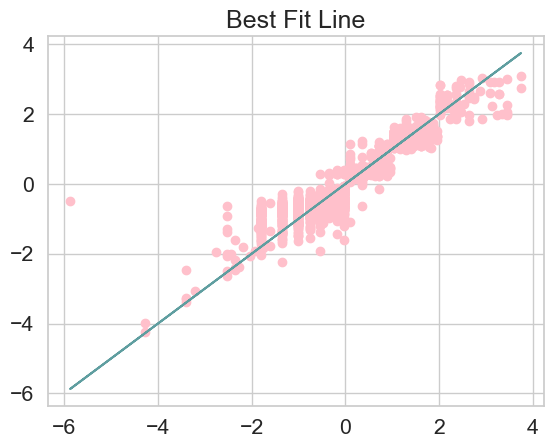

In [156]:
plt.scatter(x=y_test,y=pred2,color='pink')
plt.plot(y_test,y_test,color='cadetblue')
plt.title('Best Fit Line',fontsize=18)

## Saving the final model

In [157]:
# Saving the model using .pkl
import joblib
joblib.dump(fmodel_reg,"Zomato Restaurant_Avg price for 2.pkl")

['Zomato Restaurant_Avg price for 2.pkl']

In [158]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()

In [159]:
model.fit(x_train,y_train)

GradientBoostingRegressor()

In [160]:
testing_data_prediction = model.predict(x_test)

In [161]:
from sklearn import metrics
score = metrics.r2_score(y_test,testing_data_prediction)
score

0.8454681900520143

In [162]:
x.head(2)

,Country,Restaurant Name,Address,Locality,Cuisines,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating text,Votes\r
0,-0.037854,-0.204189,-0.056261,-2.146082,1.001928,0.009202,-0.373374,-0.616736,1.386704,0.922745,0.219946,0.977911
1,-0.037854,0.758286,-0.035738,-2.146082,1.001928,0.009202,-0.373374,-0.616736,0.697213,0.657407,0.219946,0.619054


In [174]:
df_new.head(2)

,Country,Restaurant Name,Address,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating text,Votes\r
0,3,3201,4553,17,1514,0.812403,4,-0.373374,-0.616736,1.386704,3.9,2,0.977911
1,3,5261,4605,17,1514,0.550638,4,-0.373374,-0.616736,0.697213,3.5,2,0.619054


In [191]:
#BULDING THE PREDICTION SYSTEM
input_data = (3,3201,4553,17,1514,4,-0.37,-0.61,1.38,3.9,2,0.977)
input_data_array = np.asarray(input_data)

#reshaping the data so that it works for only one instance at a time
input_data_reshaped = input_data_array.reshape(1,-1)

prediction =model.predict(input_data_reshaped)
print('Predicted Average Cost for two : ',str(prediction))

Predicted Average Cost for two :  [0.80497431]


#### actual value=0.81   but predicted price is = 0.80.  variation due to model  accuracy is 84.5% 

### Predicting the saved model

In [170]:
# Loading the saved model
model=joblib.load("Zomato Restaurant_Avg price for 2.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([-0.65933652,  0.34112304, -0.7431463 , ..., -0.41853234,
        1.21766693,  1.49325008])

In [172]:
hs= joblib.load(open("Zomato Restaurant_Avg price for 2.pkl", 'rb'))
result = hs.score(x_test, y_test)*100
print(result)

85.18118931475546


In [173]:
import numpy as np
a=np.array(y_test)
predicted=np.array(model.predict(x_test))
df_com=pd.DataFrame({'original':a, 'predicted':predicted},index=range(len(a)))
df_com.head(9)

,original,predicted
0,-0.026199,-0.659337
1,0.232582,0.341123
2,-1.352163,-0.743146
3,-1.019423,-0.761110
4,-0.533175,-0.880225
5,2.171184,2.174726
6,-0.533175,-0.596500
7,1.509156,1.293958
8,-0.175643,-0.295765


#### Original and Predicted values are nearly close. variation due to model  accuracy is 84.5%

In [192]:
model =df_com.to_csv('Zomato Restaurant_Avg price for 2.csv')
model

##### Model Prediction saved in CSV format

## thank you